In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
import csv

data = open(r"C:\Users\zenit\OneDrive\Desktop\NY listing csv file\new_york_listings_2024.csv")
data = csv.reader(data)
print(data)

In [3]:
df = pd.read_csv(r"C:\Users\zenit\OneDrive\Desktop\NY listing csv file\new_york_listings_2024.csv")
# df.index.name = None
df.head()

# df means DataFrame
# df.head gives the first 5 rows information


id                                               name  \
0             1312228         Rental unit in Brooklyn · ★5.0 · 1 bedroom   
1            45277537  Rental unit in New York · ★4.67 · 2 bedrooms ·...   
2  971353993633883038  Rental unit in New York · ★4.17 · 1 bedroom · ...   
3             3857863  Rental unit in New York · ★4.64 · 1 bedroom · ...   
4            40896611  Condo in New York · ★4.91 · Studio · 1 bed · 1...   

     host_id           host_name neighbourhood_group       neighbourhood  \
0    7130382              Walter            Brooklyn        Clinton Hill   
1   51501835            Jeniffer           Manhattan      Hell's Kitchen   
2  528871354              Joshua           Manhattan             Chelsea   
3   19902271  John And Catherine           Manhattan  Washington Heights   
4   61391963      Stay With Vibe           Manhattan         Murray Hill   

    latitude  longitude        room_type  price  ...  last_review  \
0  40.683710 -73.964610     Private room   55.0  ...   2015-12-20   
1  40.766610 -73.988100  Entire home/apt  144.0  ...   2023-05-01   
2  40.750764 -73.994605  Entire home/apt  187.0  ...   2023-12-18   
3  40.835600 -73.942500     Private room  120.0  ...   2023-09-17   
4  40.751120 -73.978600  Entire home/apt   85.0  ...   2023-12-03   

   reviews_per_month calculated_host_listings_count  availability_365  \
0               0.03                              1                 0   
1               0.24                            139               364   
2               1.67                              1               343   
3               1.38                              2               363   
4               0.24                            133               335   

   number_of_reviews_ltm     license  rating bedrooms beds          baths  
0                      0  No License    5.0         1    1  Not specified  
1                      2  No License   4.67         2    1              1  
2                      6      Exempt   4.17         1    2              1  
3                     12  No License   4.64         1    1              1  
4                      3  No License   4.91    Studio    1              1  

[5 rows x 22 columns]

In [4]:
#Getting overview of all the columns in the data frame
df.info()

#df.info() is a quick way to understand the structure and size of your data!



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

#gives you a quick list showing how many missing values there are in each column of your data.


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [6]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column}{df[column].isnull().sum()}{df[column].dtypes}")
        
        #print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")


In [7]:
df["last_review"] = pd.to_datetime(df.last_review)

#converts the values in the "last_review" column of the DataFrame df to datetime format.

In [8]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
df.tail()

#fills any missing values in the "reviews_per_month" column of the DataFrame df with the column's mean value, then displays the last five rows of df.

id                                               name  \
20753            24736896  Rental unit in New York · ★4.75 · 1 bedroom · ...   
20754             2835711  Rental unit in New York · ★4.46 · 1 bedroom · ...   
20755            51825274  Rental unit in New York · ★4.93 · 1 bedroom · ...   
20756  782661008019550832  Rental unit in New York · ★5.0 · 1 bedroom · 1...   
20757  566029911248687183  Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...   

         host_id host_name neighbourhood_group      neighbourhood   latitude  \
20753  186680487   Henry D           Manhattan    Lower East Side  40.711380   
20754    3237504     Aspen           Manhattan  Greenwich Village  40.730580   
20755  304317395      Jeff           Manhattan     Hell's Kitchen  40.757350   
20756  163083101   Marissa           Manhattan          Chinatown  40.713750   
20757   93827372   Glenroy              Queens           Rosedale  40.658874   

       longitude        room_type  price  ...  last_review  reviews_per_month  \
20753 -73.991560     Private room   45.0  ...   2023-09-29               1.81   
20754 -74.000700  Entire home/apt  105.0  ...   2023-07-01               0.48   
20755 -73.993430  Entire home/apt  299.0  ...   2023-12-08               2.09   
20756 -73.991470  Entire home/apt  115.0  ...   2023-09-17               0.91   
20757 -73.728651     Private room  102.0  ...   2023-12-10               4.50   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
20753                              1               157                     12   
20754                              1                 0                      1   
20755                              1                 0                     27   
20756                              1               363                      7   
20757                              1                 0                     62   

                  license  rating bedrooms beds baths  
20753          No License   4.75         1    1     1  
20754          No License   4.46         1    2     1  
20755          No License   4.93         1    1     1  
20756          No License    5.0         1    1     1  
20757  OSE-STRREG-0000513   4.89         1    1     1  

[5 rows x 22 columns]

In [9]:
df.last_review.fillna(method="ffill", inplace=True)

#fills missing values in the "last_review" column of the DataFrame df by propagating the last valid value forward, modifying df in place.

C:\Users\zenit\AppData\Local\Temp\ipykernel_5756\428458166.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.last_review.fillna(method="ffill", inplace=True)


In [10]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

In [11]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mode()[0])

#fills missing values in each column of the DataFrame df with the column's most frequent value (mode), but only for columns that contain missing values.

In [12]:
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [13]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

id      host_id  latitude  longitude     price  \
count               20758.00     20758.00  20758.00   20758.00  20758.00   
mean   303404386773971136.00 174931562.15     40.73     -73.94    187.78   
min                  2595.00      1678.00     40.50     -74.25     10.00   
25%              27088080.00  20417384.50     40.68     -73.98     80.00   
50%              49930032.50 108727121.00     40.72     -73.95    125.00   
75%    721601888994556672.00 314410176.00     40.76     -73.92    199.00   
max   1054375518474819584.00 550403525.00     40.91     -73.71 100000.00   
std    390121559478713024.00 172554113.31      0.06       0.06   1022.80   

       minimum_nights  number_of_reviews                    last_review  \
count        20758.00           20758.00                          20758   
mean            28.56              42.64  2023-02-24 12:28:55.658541312   
min              1.00               1.00            2011-12-10 00:00:00   
25%             30.00               4.00            2023-04-08 00:00:00   
50%             30.00              14.00            2023-09-20 00:00:00   
75%             30.00              49.00            2023-11-25 00:00:00   
max           1250.00            1865.00            2024-01-05 00:00:00   
std             33.54              73.56                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count           20758.00                        20758.00          20758.00   
mean                1.26                           18.84            205.99   
min                 0.01                            1.00              0.00   
25%                 0.21                            1.00             87.00   
50%                 0.65                            2.00            215.00   
75%                 1.80                            5.00            353.00   
max                75.49                          713.00            365.00   
std                 1.90                           70.91            135.09   

       number_of_reviews_ltm     beds  
count               20758.00 20758.00  
mean                   10.85     1.72  
min                     0.00     1.00  
25%                     1.00     1.00  
50%                     3.00     1.00  
75%                    15.00     2.00  
max                  1075.00    42.00  
std                    21.36     1.21

In [14]:
categorical_col = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        print("===============================================================================")
        print(f"{column} : {df[column].unique()}")
        categorical_col.append(column)

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
room_type : ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [15]:
# Drop ["id", "host_name"] because because these fields may not add meaningful insights for analysis
df.drop(["id", "host_name"], axis="columns", inplace=True)
df.head()

name    host_id  \
0         Rental unit in Brooklyn · ★5.0 · 1 bedroom    7130382   
1  Rental unit in New York · ★4.67 · 2 bedrooms ·...   51501835   
2  Rental unit in New York · ★4.17 · 1 bedroom · ...  528871354   
3  Rental unit in New York · ★4.64 · 1 bedroom · ...   19902271   
4  Condo in New York · ★4.91 · Studio · 1 bed · 1...   61391963   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn        Clinton Hill     40.68     -73.96   
1           Manhattan      Hell's Kitchen     40.77     -73.99   
2           Manhattan             Chelsea     40.75     -73.99   
3           Manhattan  Washington Heights     40.84     -73.94   
4           Manhattan         Murray Hill     40.75     -73.98   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  55.00              30                  3  2015-12-20   
1  Entire home/apt 144.00              30                  9  2023-05-01   
2  Entire home/apt 187.00               2                  6  2023-12-18   
3     Private room 120.00              30                156  2023-09-17   
4  Entire home/apt  85.00              30                 11  2023-12-03   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.03                               1                 0   
1               0.24                             139               364   
2               1.67                               1               343   
3               1.38                               2               363   
4               0.24                             133               335   

   number_of_reviews_ltm     license rating bedrooms  beds          baths  
0                      0  No License   5.0         1     1  Not specified  
1                      2  No License  4.67         2     1              1  
2                      6      Exempt  4.17         1     2              1  
3                     12  No License  4.64         1     1              1  
4                      3  No License  4.91    Studio     1              1

In [16]:
df.last_review.isnull().sum()


0

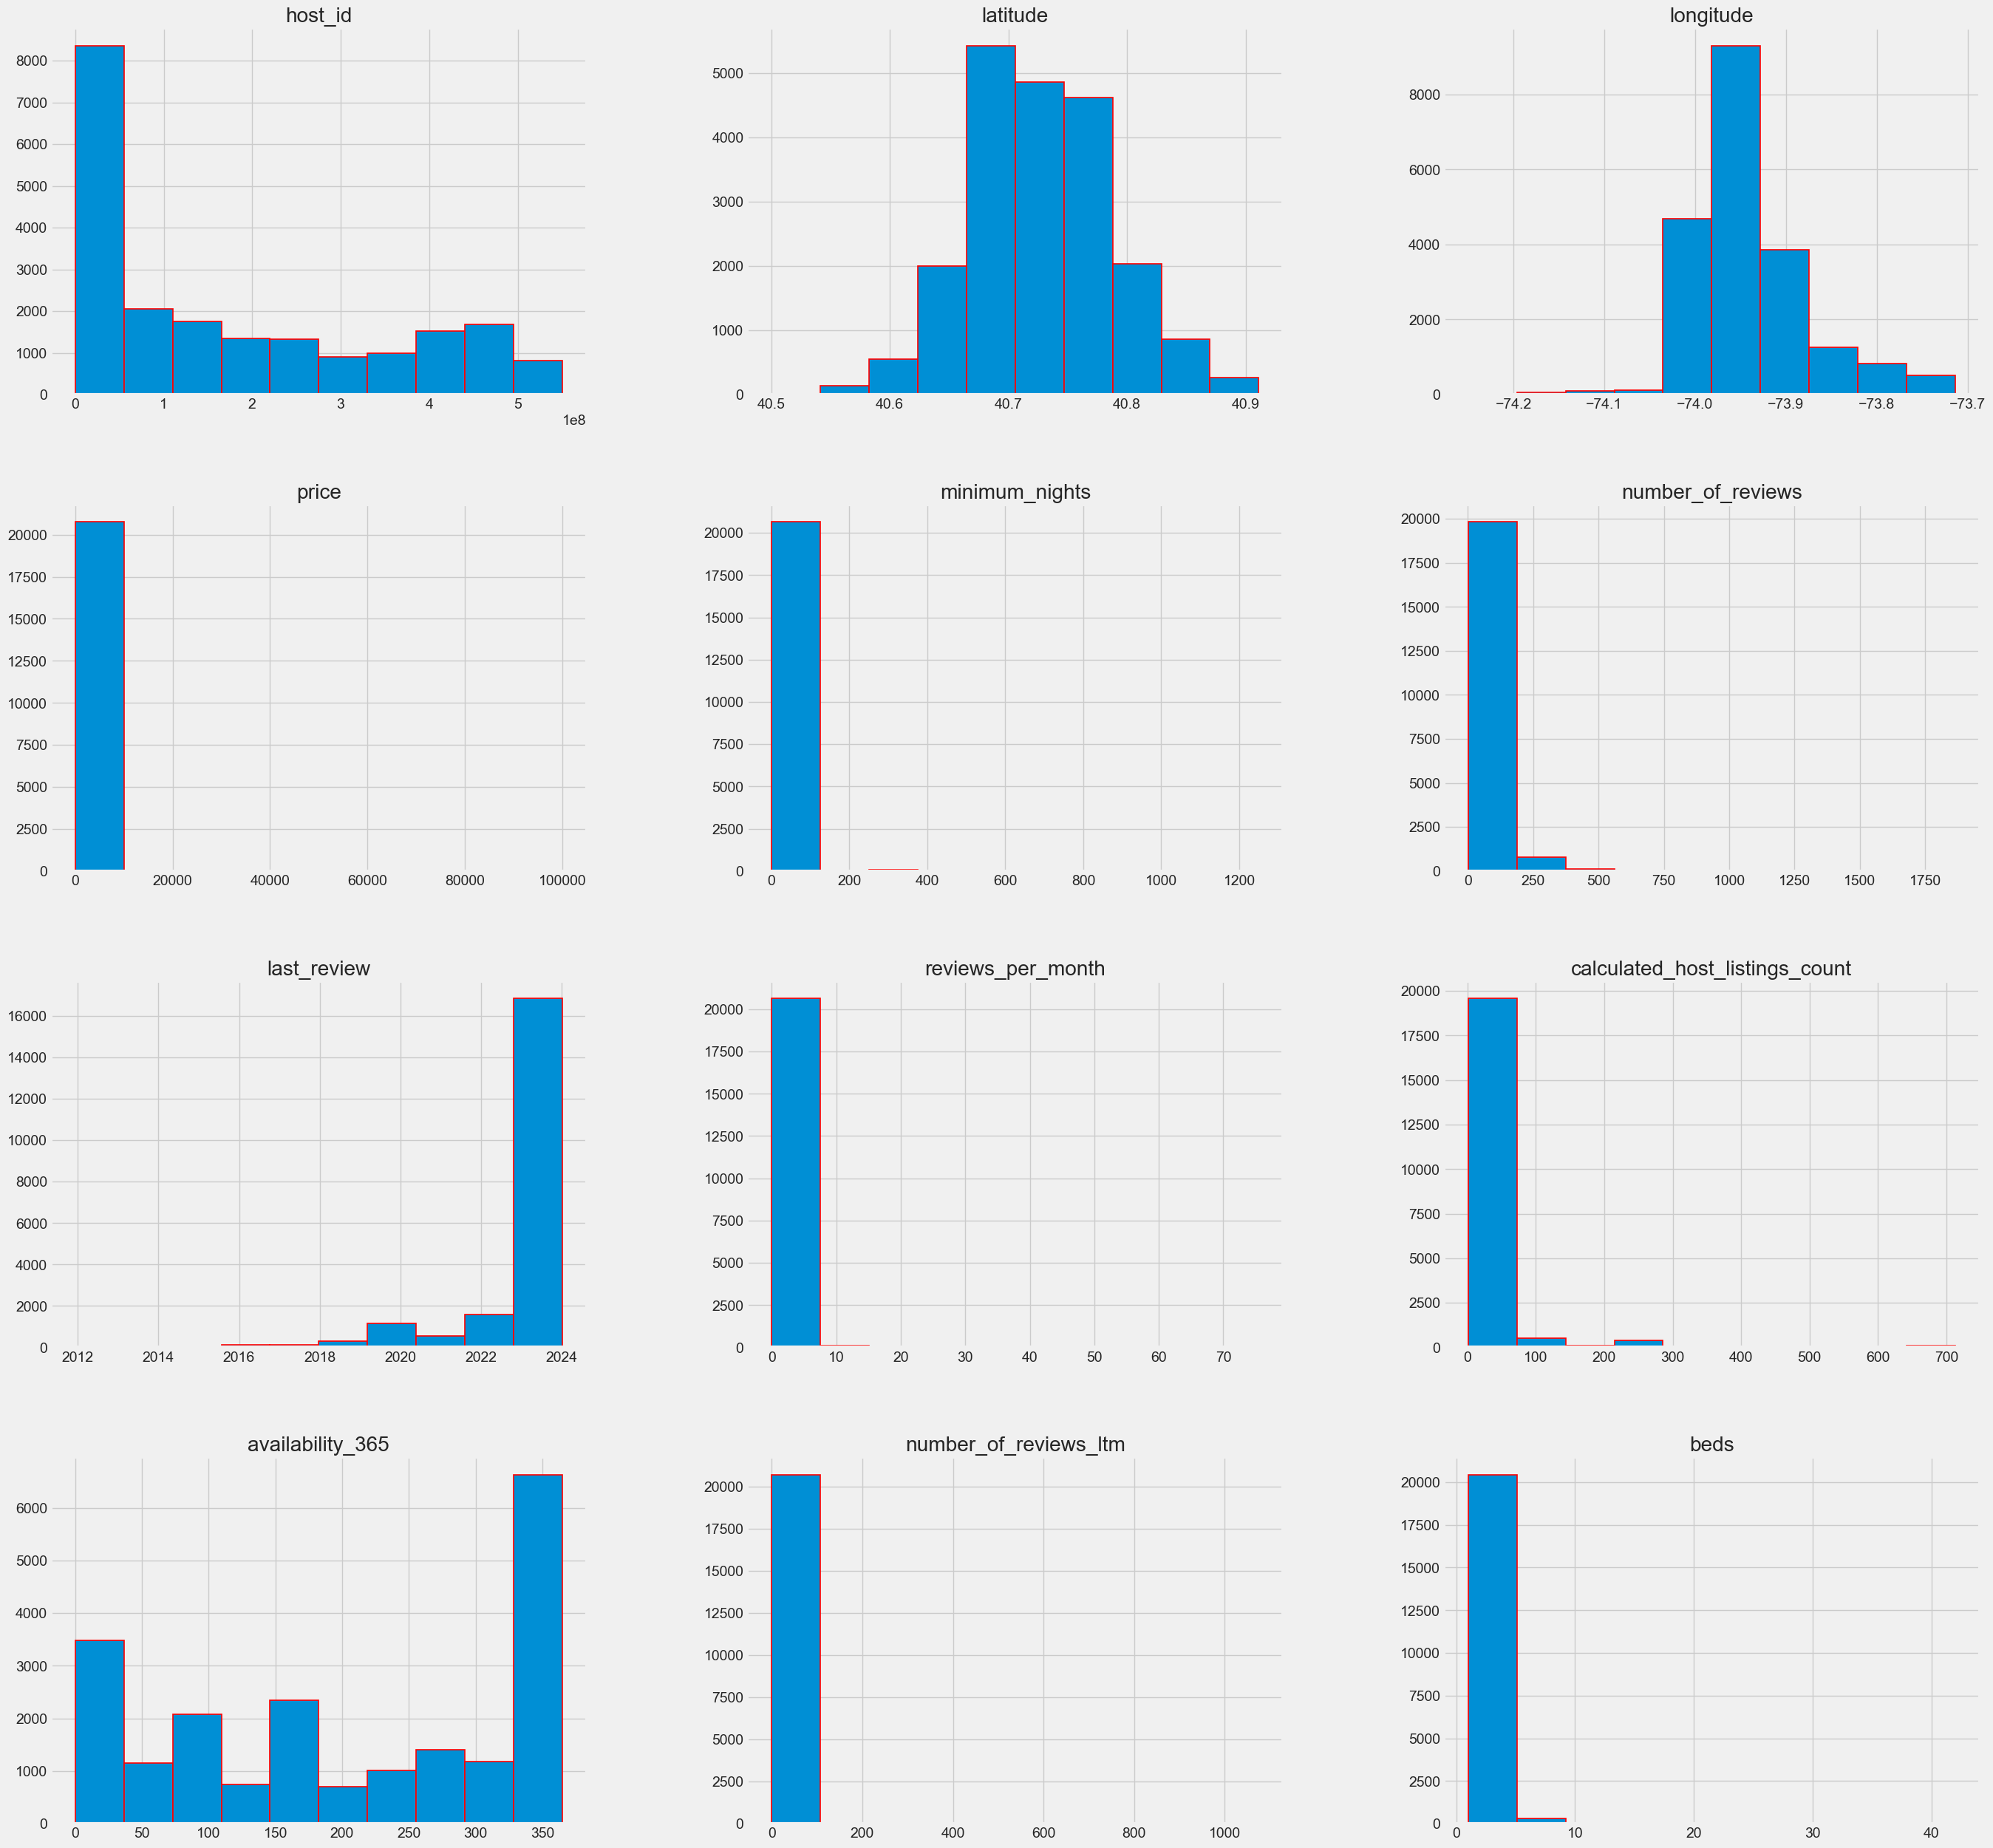

In [17]:
# Visualizing the distribution for every "feature(column)"
df.hist(edgecolor="red", linewidth=1.2, figsize=(30, 30));

#generates histograms for each numerical column in the DataFrame df with red edges and a line width of 1.2, and displays them in a 30x30-inch figure.

<Figure size 3000x3000 with 0 Axes>

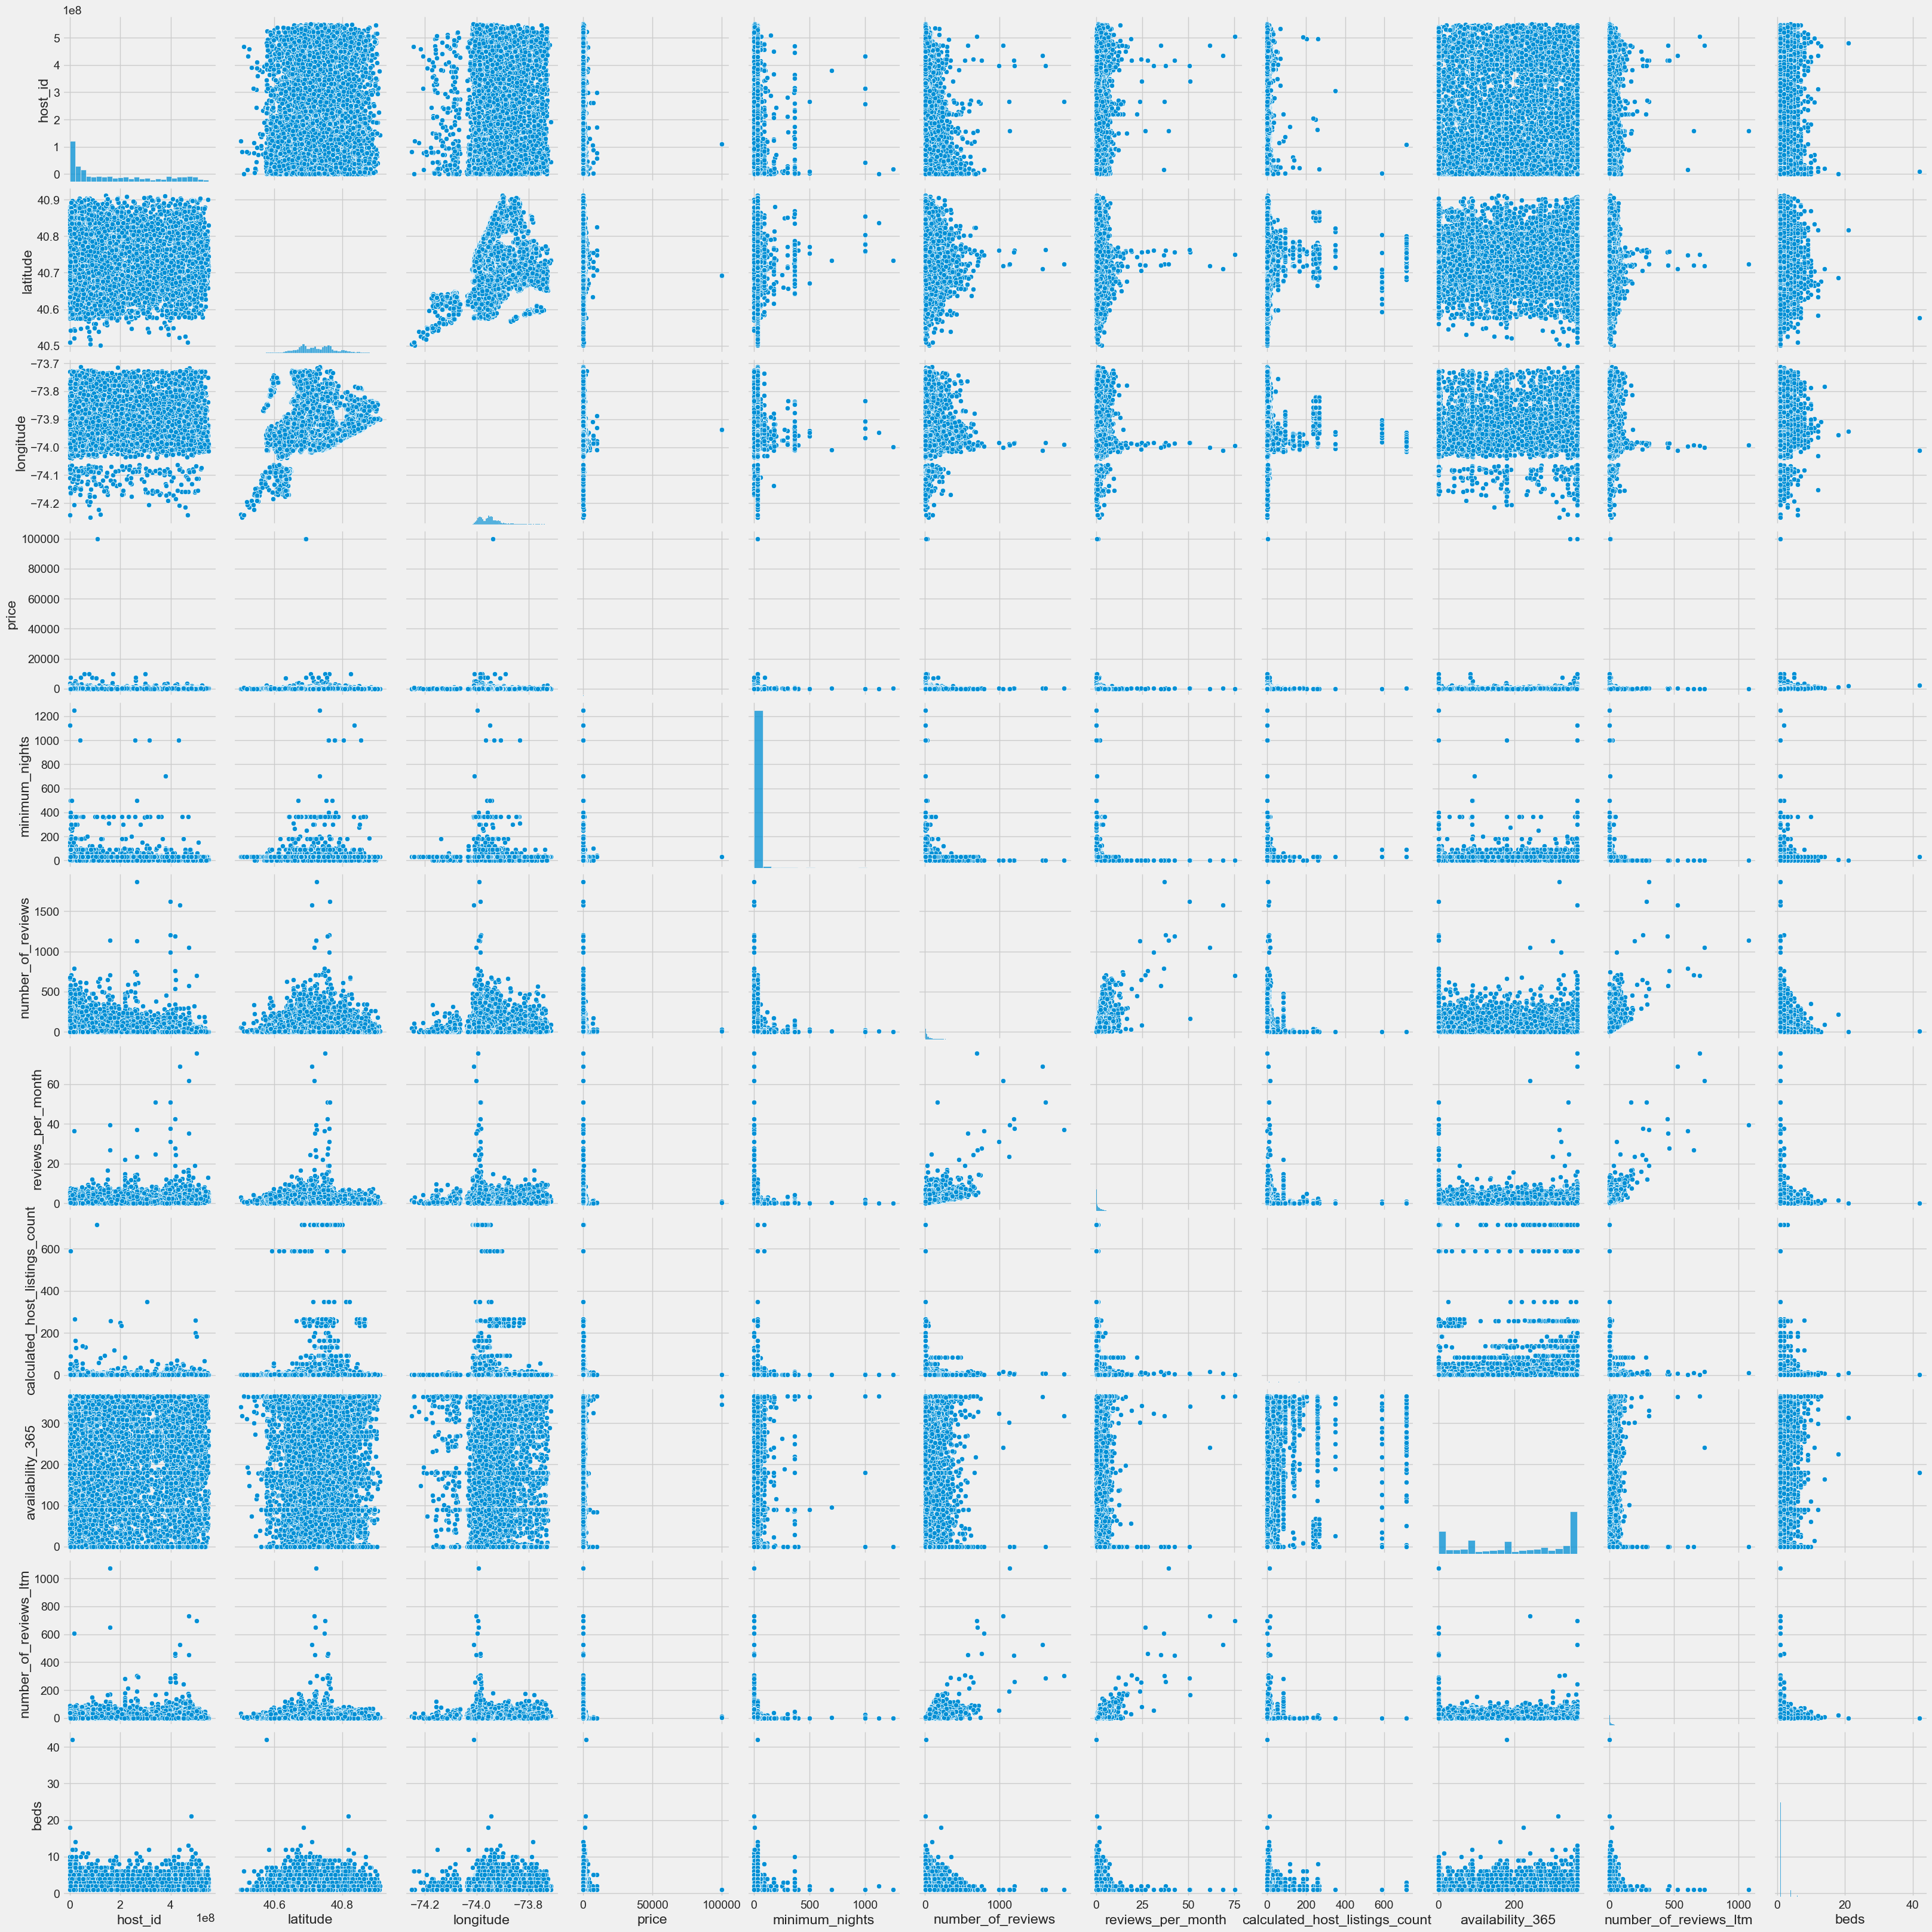

In [18]:
#To creates a pair plot of all numerical columns in the DataFrame df, with histograms on the diagonal
plt.figure(figsize=(30, 30))
sns.pairplot(df, height=3, diag_kind="hist")



In [19]:
# List all column names in the DataFrame
col = list(df.columns)

# Safely remove 'latitude' and 'longitude' if they exist
if "latitude" in col:
    col.remove("latitude")
if "longitude" in col:
    col.remove("longitude")

# Print the updated list of column names
print(col)

['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'beds', 'baths']


In [20]:
categorical_col
#Since we are using categorical data, "categorical_col" can be used. This term helps streamline these tasks and make the code cleaner and more readable.

['neighbourhood_group', 'room_type']

In [21]:
#Neighbourhood Group

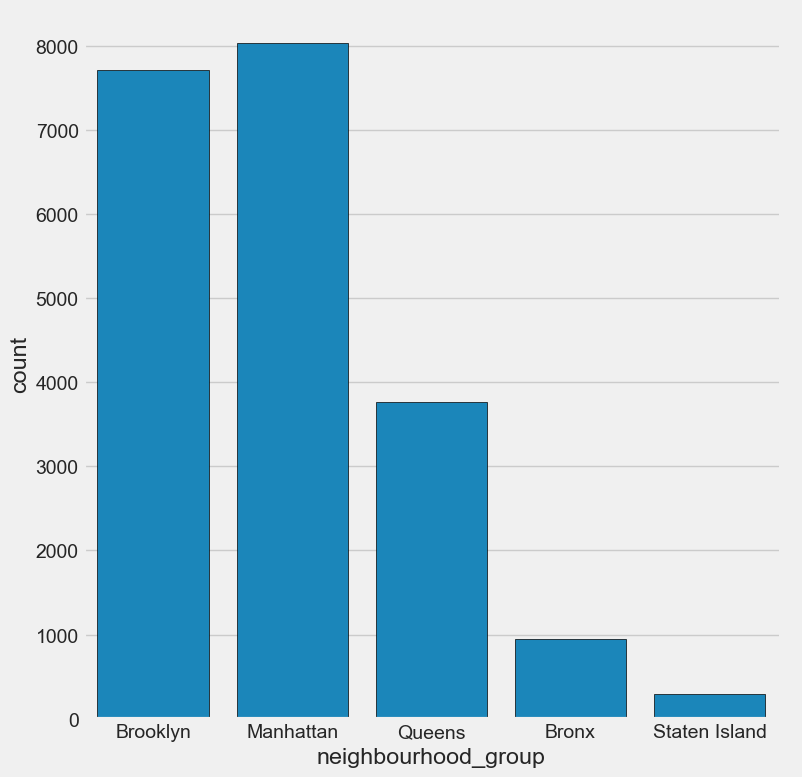

In [24]:
#showing the count of entries for each category in the "neighbourhood_group" column of the DataFrame df, with the plot height set to 8 inches.

sns.catplot(x="neighbourhood_group", data=df, kind="count", height=8, edgecolor="black")


In [25]:
#Kedplots and catplot for Neighbourhood_group, room_type and price

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

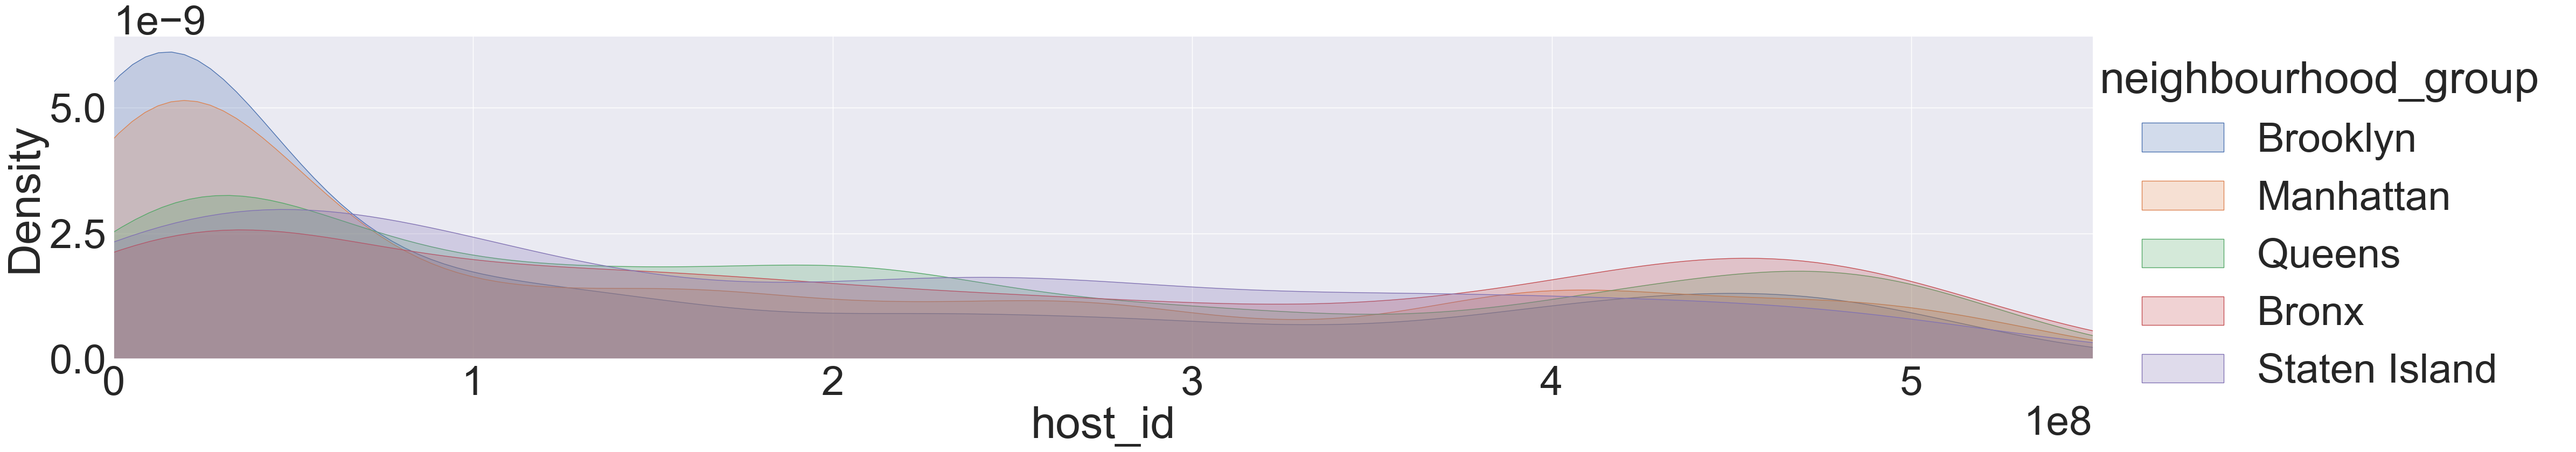

In [28]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot for "neighbourhood_group"

fig = sns.FacetGrid(df, hue="neighbourhood_group", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

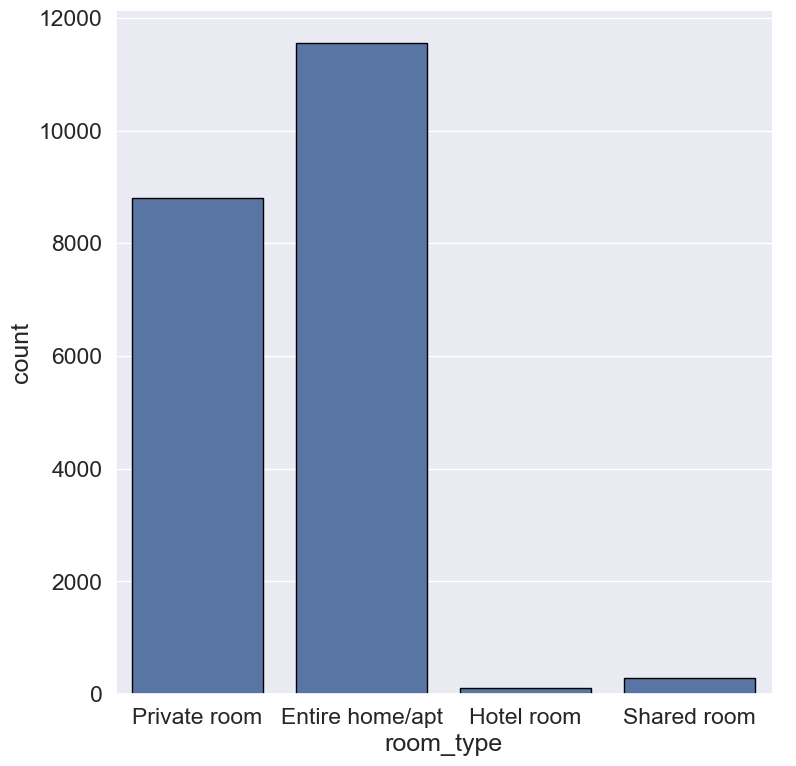

In [29]:
# Another way to visualize the data is to use FacetGrid to plot "room_type" catplot 

sns.set(font_scale=1.5)
sns.catplot(x="room_type", data=df, kind="count", height=8, edgecolor="black")

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

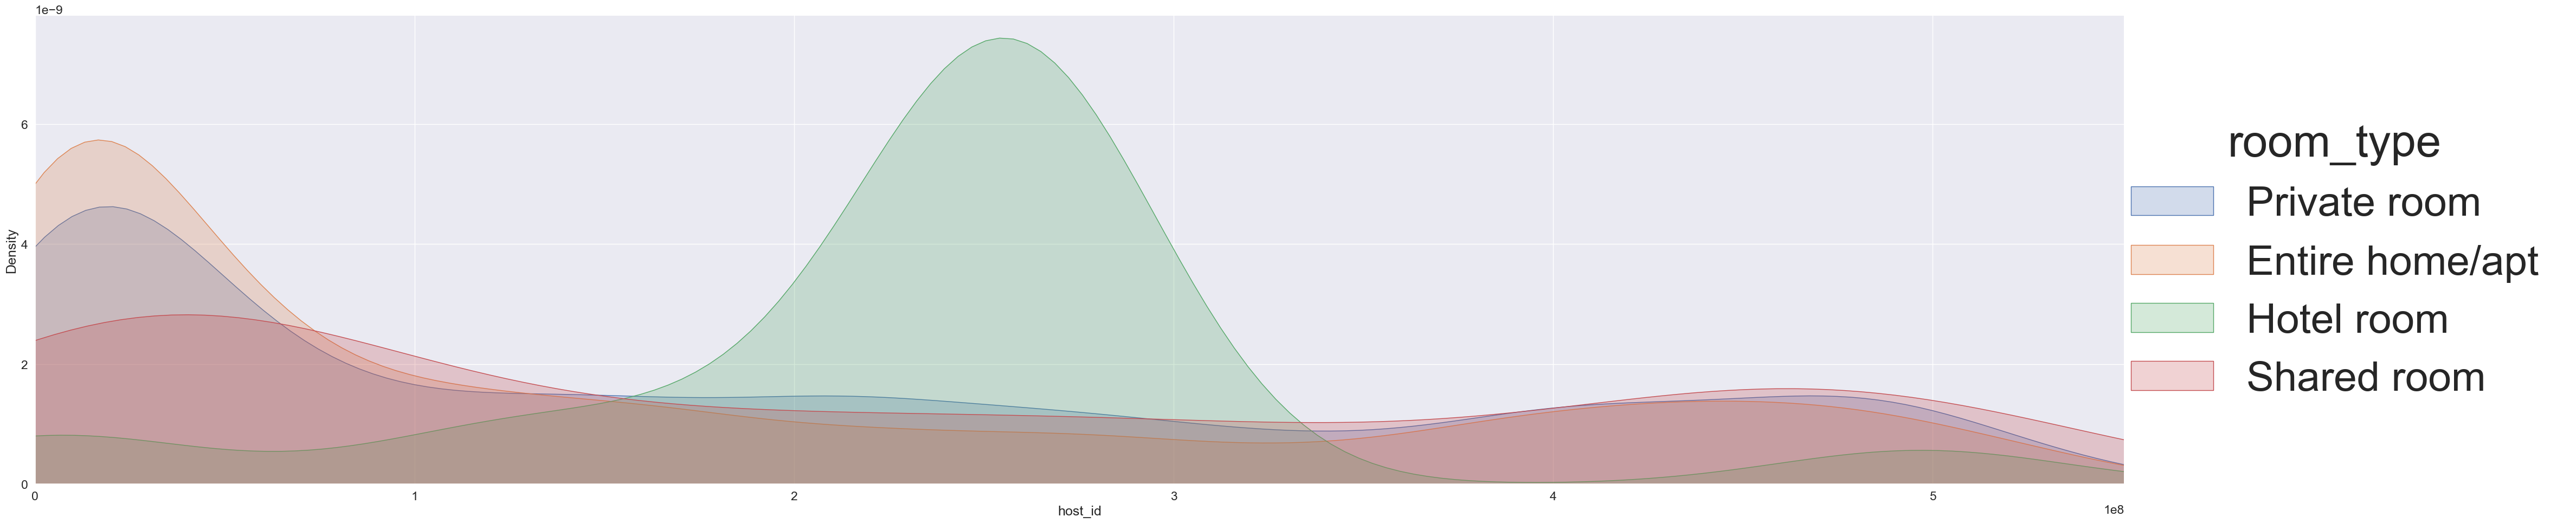

In [32]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot for "room_type"

fig = sns.FacetGrid(df, hue="room_type", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

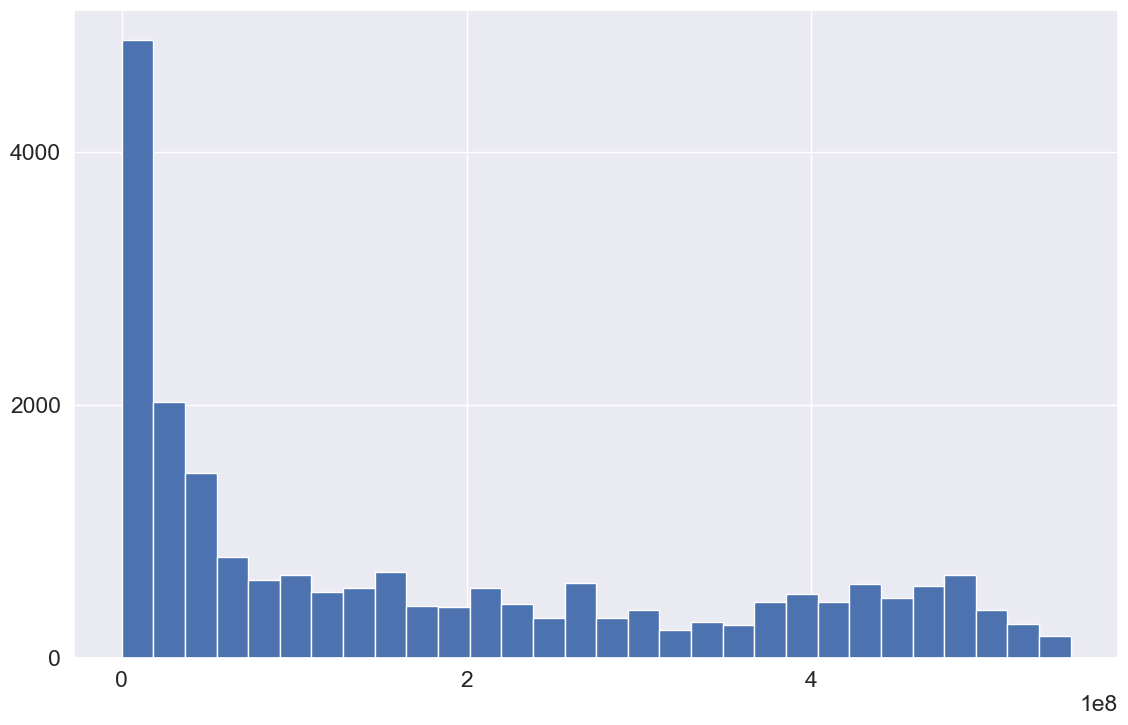

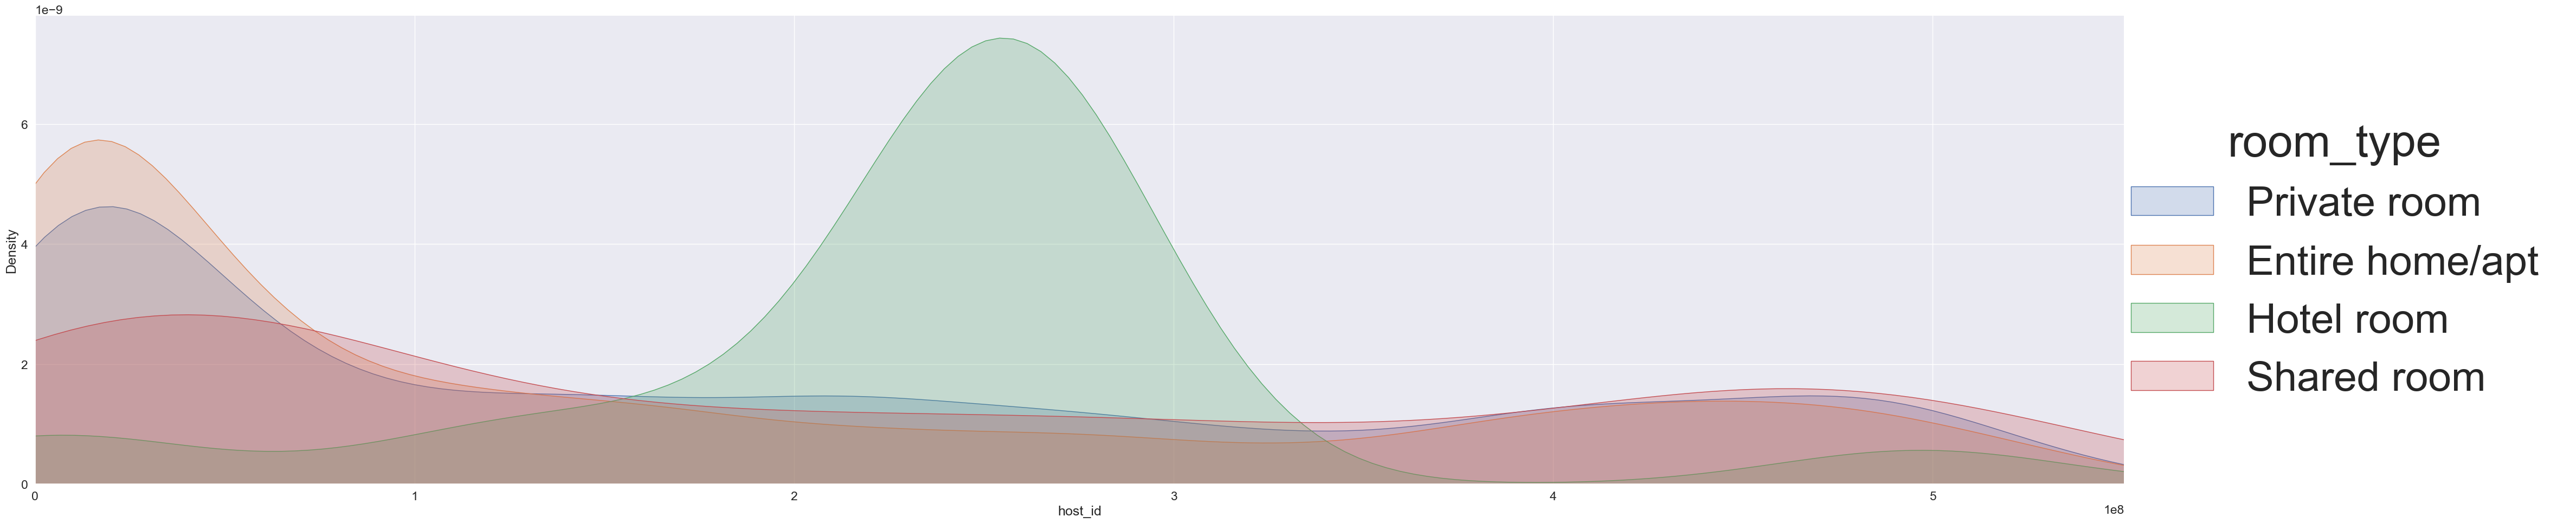

In [37]:
# Another way to visualize the data is to use FacetGrid to plot "room_type" catplot 

sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
df.host_id.hist(bins=30)
fig = sns.FacetGrid(df, hue="room_type", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            20758 non-null  object        
 1   host_id                         20758 non-null  int64         
 2   neighbourhood_group             20758 non-null  object        
 3   neighbourhood                   20758 non-null  object        
 4   latitude                        20758 non-null  float64       
 5   longitude                       20758 non-null  float64       
 6   room_type                       20758 non-null  object        
 7   price                           20758 non-null  float64       
 8   minimum_nights                  20758 non-null  int64         
 9   number_of_reviews               20758 non-null  int64         
 10  last_review                     20758 non-null  datetime64[ns]
 11  re

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

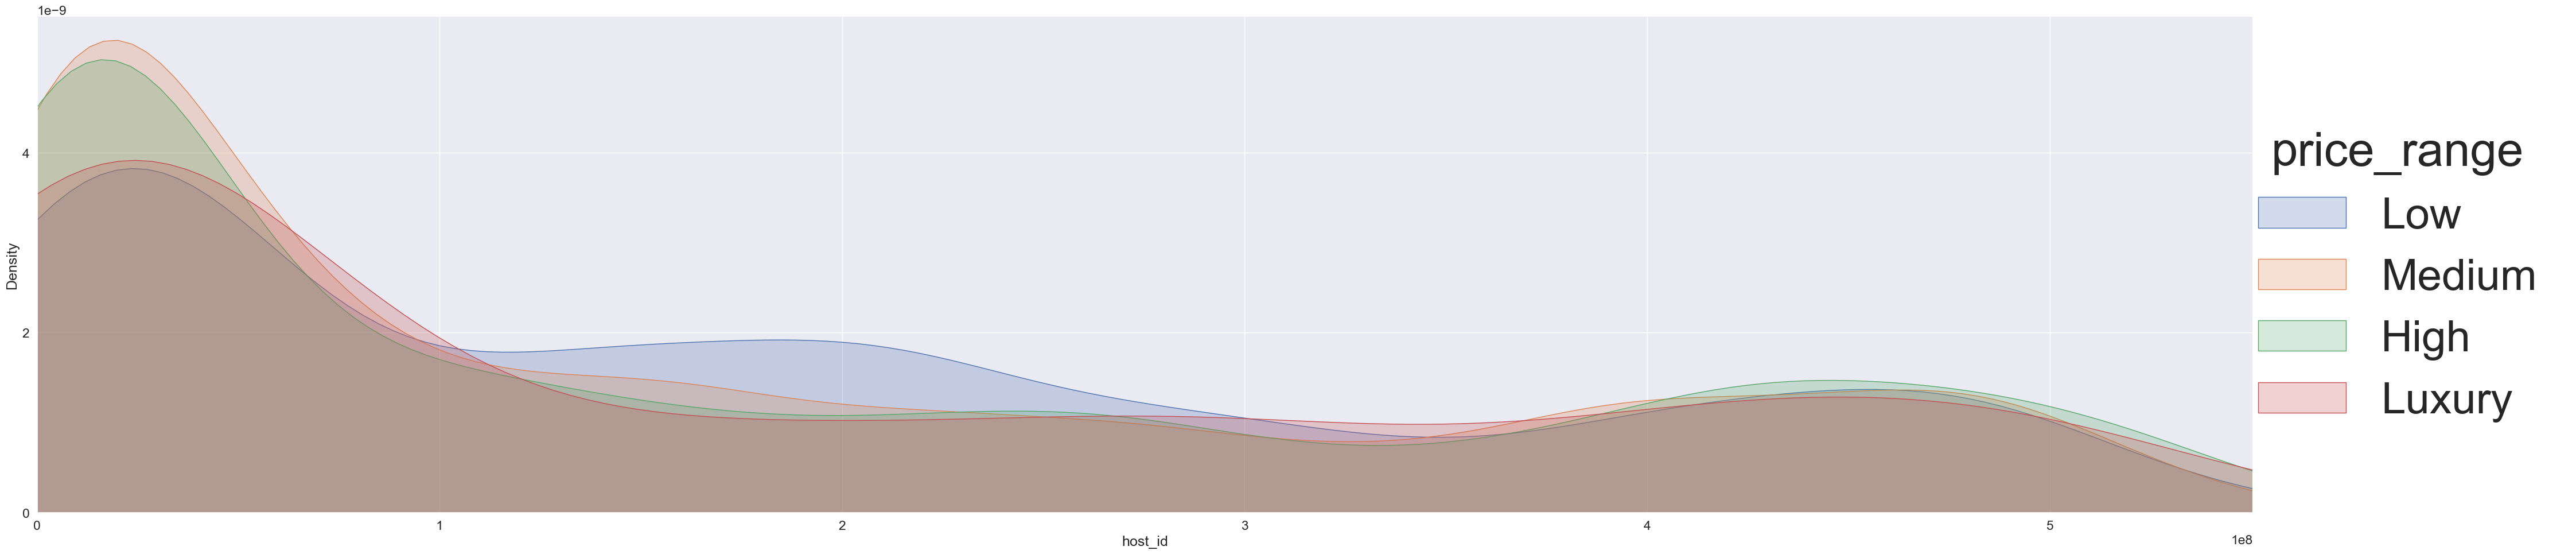

In [47]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
# Categorize the 'price' column into 'price_range'
# Adjust the bins and labels based on your data distribution
df['price_range'] = pd.cut(
    df['price'], 
    bins=[0, 50, 150, 500, df['price'].max()], 
    labels=['Low', 'Medium', 'High', 'Luxury']
)

# Create the FacetGrid with the new 'price_range' column
fig = sns.FacetGrid(df, hue="price_range", aspect=4, height=10)

# Plot Kernel Density Estimate for 'host_id'
fig.map(sns.kdeplot, 'host_id', shade=True)

# Set x-axis limit based on maximum 'host_id'
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))

# Adjust font scale for readability
sns.set(font_scale=5)

# Add legend to the plot
fig.add_legend()

# Show the plot
plt.show()



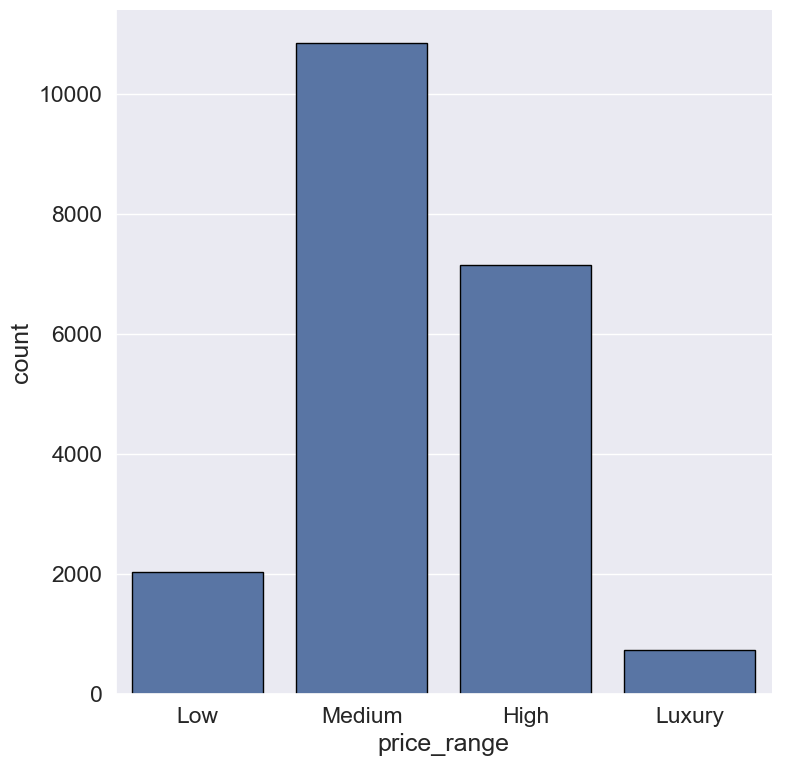

In [49]:
sns.set(font_scale=1.5)
sns.catplot(x="price_range", data=df, kind="count", height=8, edgecolor="black")

In [50]:
# df.neighbourhood.hist(bins=30)


<BarContainer object of 10 artists>

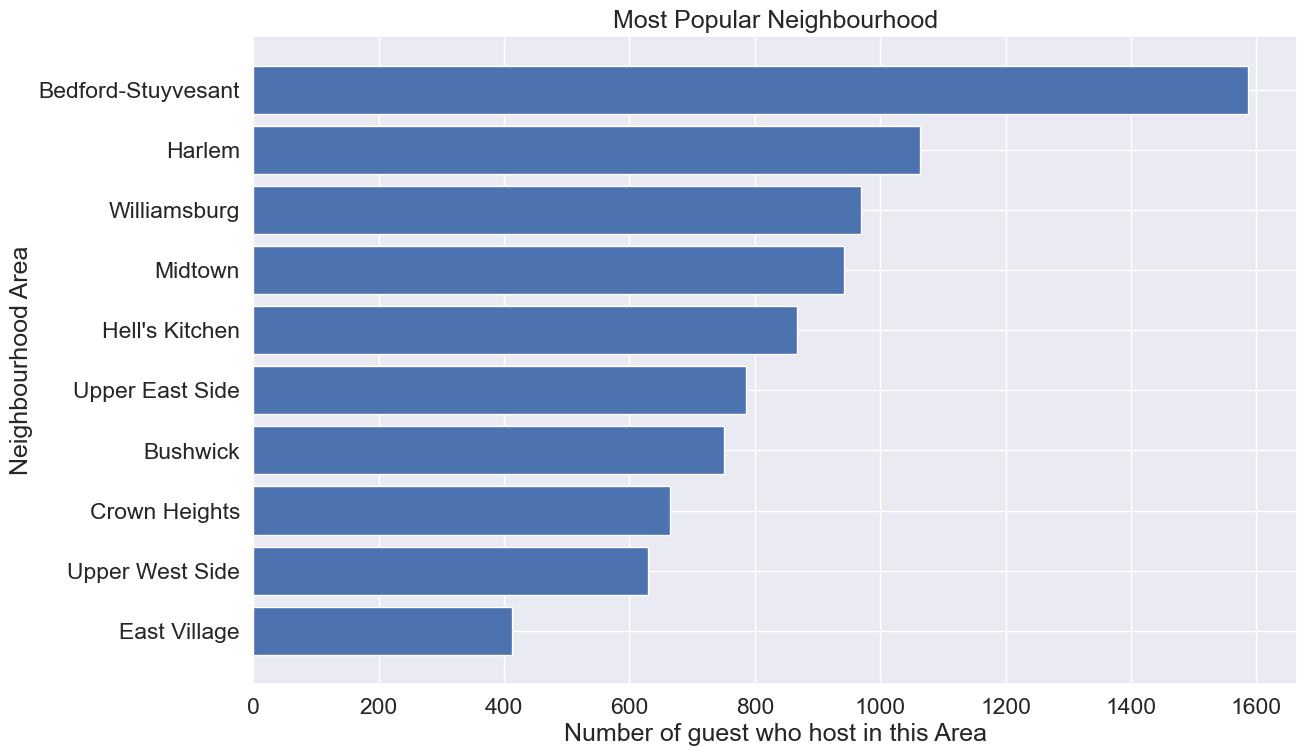

In [51]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this Area")

plt.barh(x, y)

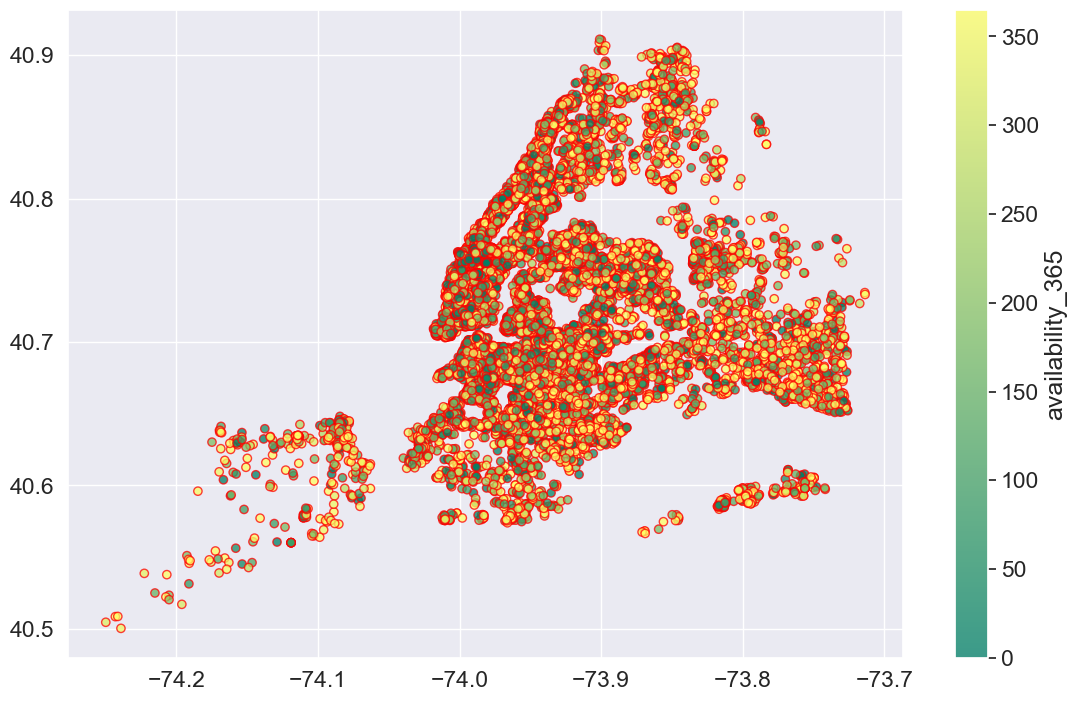

In [54]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='summer', edgecolor='red', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

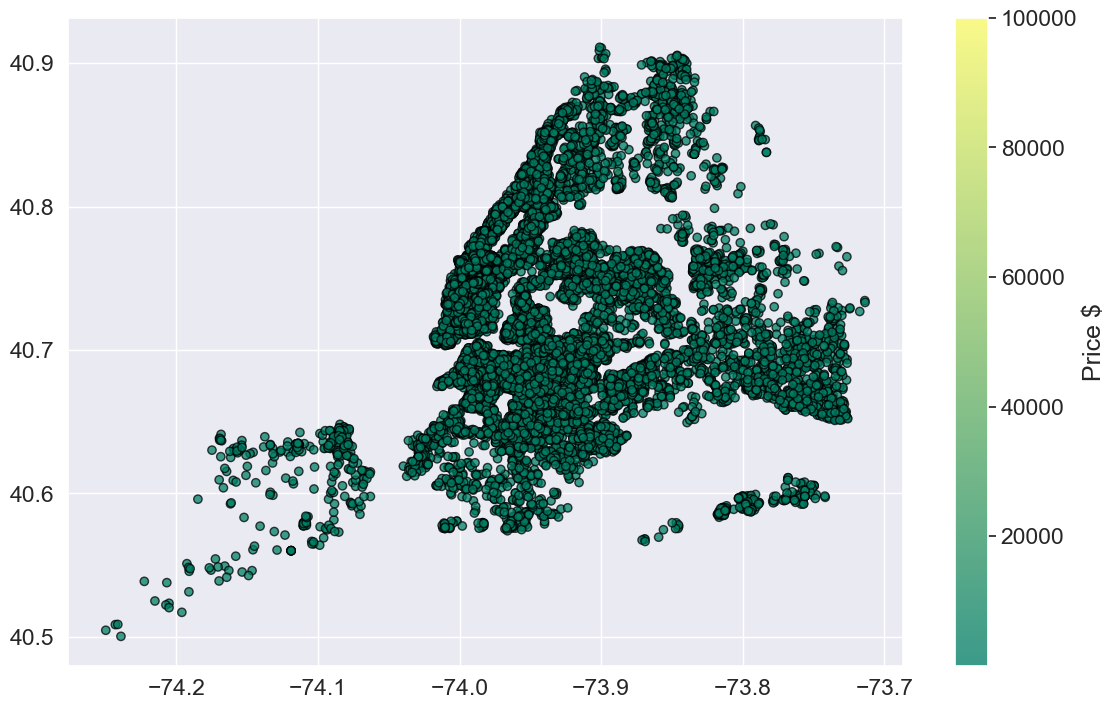

In [56]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

In [57]:
print(f"Average of price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average of price per night : $187.78
Maximum price per night : $100000.0
Minimum price per night : $10.0


In [58]:
df[df.price == 10]


name    host_id  \
1051   Rental unit in Brooklyn · ★4.55 · 1 bedroom · ...  213615269   
2865   Loft in New York · ★4.91 · 1 bedroom · 1 bed ·...   17631246   
3344   Rental unit in New York · ★5.0 · 1 bedroom · 2...   24641078   
5259   Rental unit in New York · ★5.0 · Studio · 1 be...  173864851   
8561   Rental unit in New York · ★4.83 · 2 bedrooms ·...  185265758   
9120   Rental unit in New York · ★5.0 · 1 bedroom · 1...   24641078   
15751  Rental unit in Brooklyn · ★4.86 · 1 bedroom · ...  316423586   
18456  Rental unit in Brooklyn · ★4.80 · 1 bedroom · ...  247296095   
18802  Rental unit in New York · ★4.97 · 1 bedroom · ...  172851546   

      neighbourhood_group       neighbourhood  latitude  longitude  \
1051             Brooklyn  Bedford-Stuyvesant     40.69     -73.93   
2865            Manhattan        East Village     40.73     -73.99   
3344            Manhattan     Upper East Side     40.78     -73.96   
5259            Manhattan   Battery Park City     40.71     -74.02   
8561            Manhattan              Harlem     40.82     -73.95   
9120            Manhattan     Upper East Side     40.78     -73.96   
15751            Brooklyn  Bedford-Stuyvesant     40.69     -73.93   
18456            Brooklyn        Williamsburg     40.71     -73.95   
18802           Manhattan     Upper West Side     40.80     -73.96   

             room_type  price  minimum_nights  number_of_reviews  ...  \
1051   Entire home/apt  10.00              30                 11  ...   
2865   Entire home/apt  10.00              30                 56  ...   
3344   Entire home/apt  10.00              30                  7  ...   
5259   Entire home/apt  10.00              30                  8  ...   
8561   Entire home/apt  10.00              30                 65  ...   
9120   Entire home/apt  10.00              30                  8  ...   
15751  Entire home/apt  10.00              30                 14  ...   
18456     Private room  10.00              30                 70  ...   
18802     Private room  10.00              30                 33  ...   

      reviews_per_month  calculated_host_listings_count  availability_365  \
1051               1.10                               1               178   
2865               0.78                               1                 0   
3344               0.24                               4                48   
5259               0.64                               1               129   
8561               1.08                               3               358   
9120               0.38                               4               135   
15751              1.71                               2               180   
18456              4.78                               1               164   
18802              0.49                               3               357   

       number_of_reviews_ltm     license rating bedrooms beds  baths  \
1051                      11  No License  4.55         1    3      1   
2865                       4  No License  4.91         1    1      1   
3344                       3  No License   5.0         1    2      1   
5259                       7  No License   5.0    Studio    1      1   
8561                       1  No License  4.83         2    3      2   
9120                       4  No License   5.0         1    1      1   
15751                     14  No License  4.86         1    2      1   
18456                     63  No License  4.80         1    1      1   
18802                      6  No License  4.97         1    1      1   

      price_range  
1051          Low  
2865          Low  
3344          Low  
5259          Low  
8561          Low  
9120          Low  
15751         Low  
18456         Low  
18802         Low  

[9 rows x 21 columns]

<Axes: >

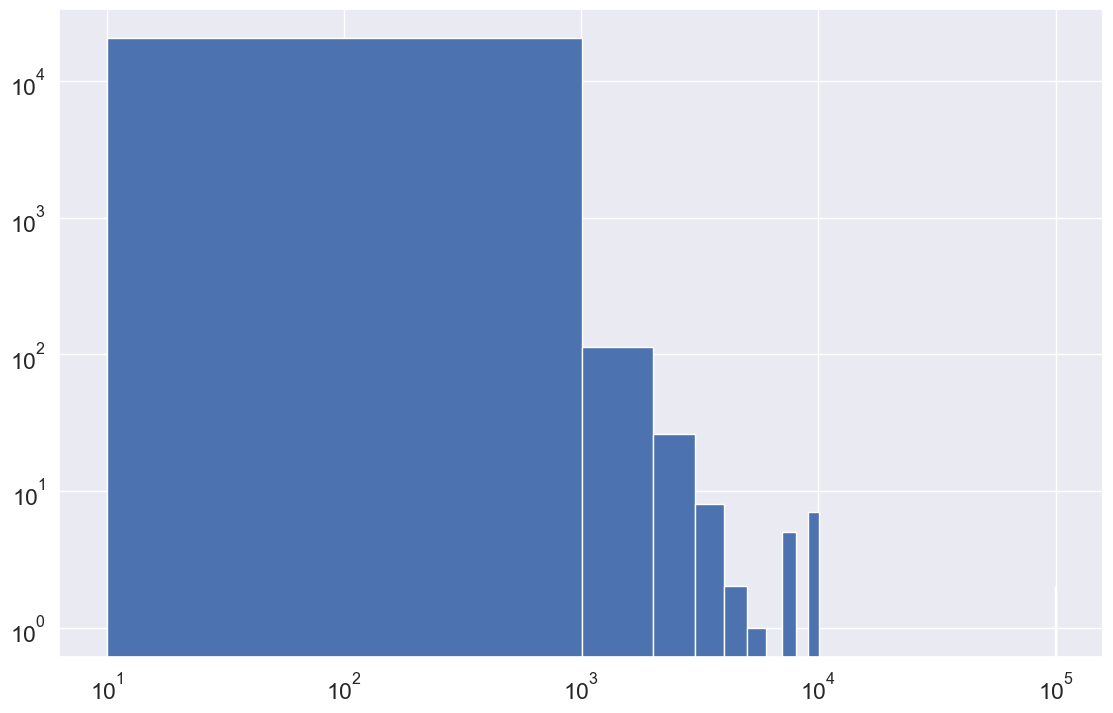

In [61]:
plt.figure(figsize=(12, 8))
plt.xscale('log')
plt.yscale('log')

df.price.hist(bins=100)

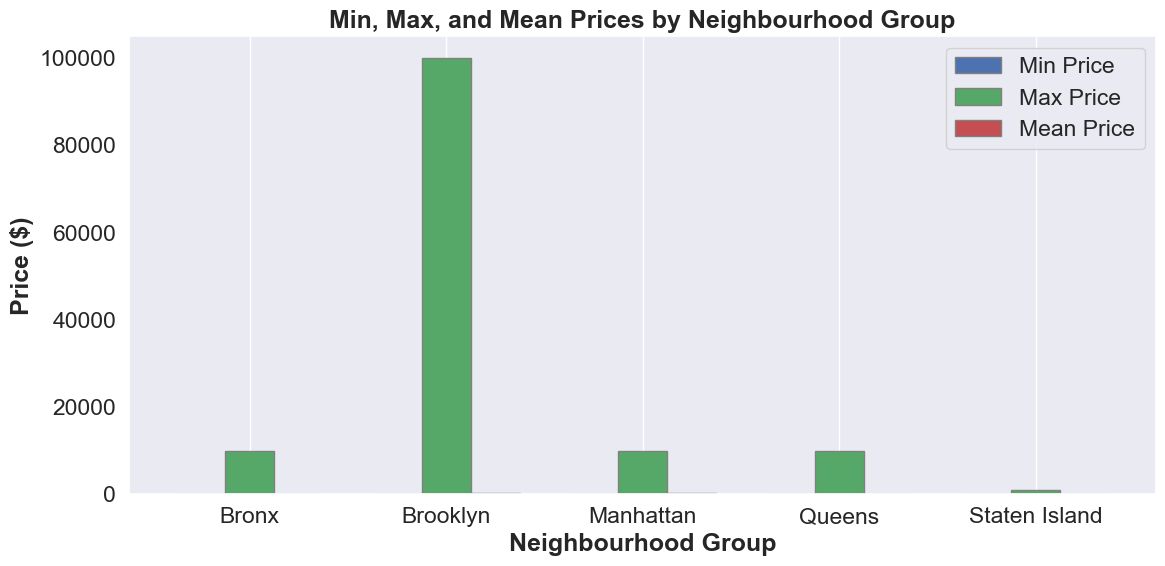

In [69]:
# Check if 'price' column exists in the DataFrame

if 'price' not in df.columns:
    print("The 'price' column does not exist in the DataFrame. Please check the column names.")
else:
    # Calculate min, max, and mean for 'price' grouped by 'neighbourhood_group'
    summary = df.groupby('neighbourhood_group')['price'].agg(['min', 'max', 'mean']).reset_index()

    # Set the bar width
    bar_width = 0.25

    # Set the positions of the bars on the x-axis
    r1 = range(len(summary))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Create the bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(r1, summary['min'], color='b', width=bar_width, edgecolor='grey', label='Min Price')
    plt.bar(r2, summary['max'], color='g', width=bar_width, edgecolor='grey', label='Max Price')
    plt.bar(r3, summary['mean'], color='r', width=bar_width, edgecolor='grey', label='Mean Price')

    # Adding labels
    plt.xlabel('Neighbourhood Group', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(summary))], summary['neighbourhood_group'])
    plt.ylabel('Price ($)', fontweight='bold')
    plt.title('Min, Max, and Mean Prices by Neighbourhood Group', fontweight='bold')
    plt.legend()
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [70]:
# Check if 'price' column exists in the DataFrame
if 'price' not in df.columns:
    print("The 'price' column does not exist in the DataFrame. Please check the column names.")
else:
    # Convert the 'price' column to numeric (in case it contains any non-numeric values)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [71]:
# Create two histograms for the specified price breakdowns
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

(0.0, 50.0)

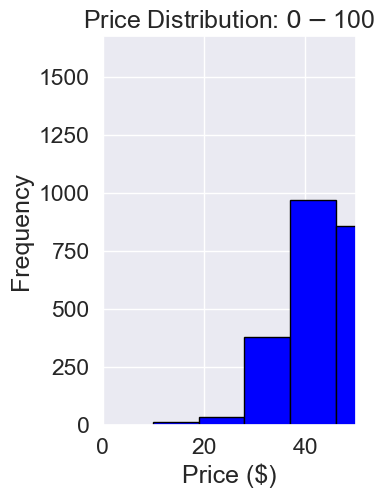

In [72]:
# Histogram for $0-$100
plt.subplot(1, 2, 1)
plt.hist(df['price'][df['price'] <= 100], bins=10, color='blue', edgecolor='black')
plt.title('Price Distribution: $0 - $100')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Set x-axis limit

(0.0, 1000.0)

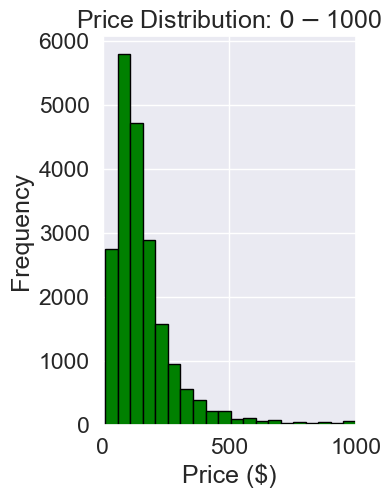

In [73]:
# Histogram for $0-$1000
plt.subplot(1, 2, 2)
plt.hist(df['price'][df['price'] <= 1000], bins=20, color='green', edgecolor='black')
plt.title('Price Distribution: $0 - $1000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Set x-axis limit

In [74]:
print(f"Average of price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average of price per night : $187.78
Maximum price per night : $100000.0
Minimum price per night : $10.0


In [75]:
# Create a new price range column
bins = [0, 100, 200, 300, 400, 500, 1000]  # Adjust the bins as needed
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=T

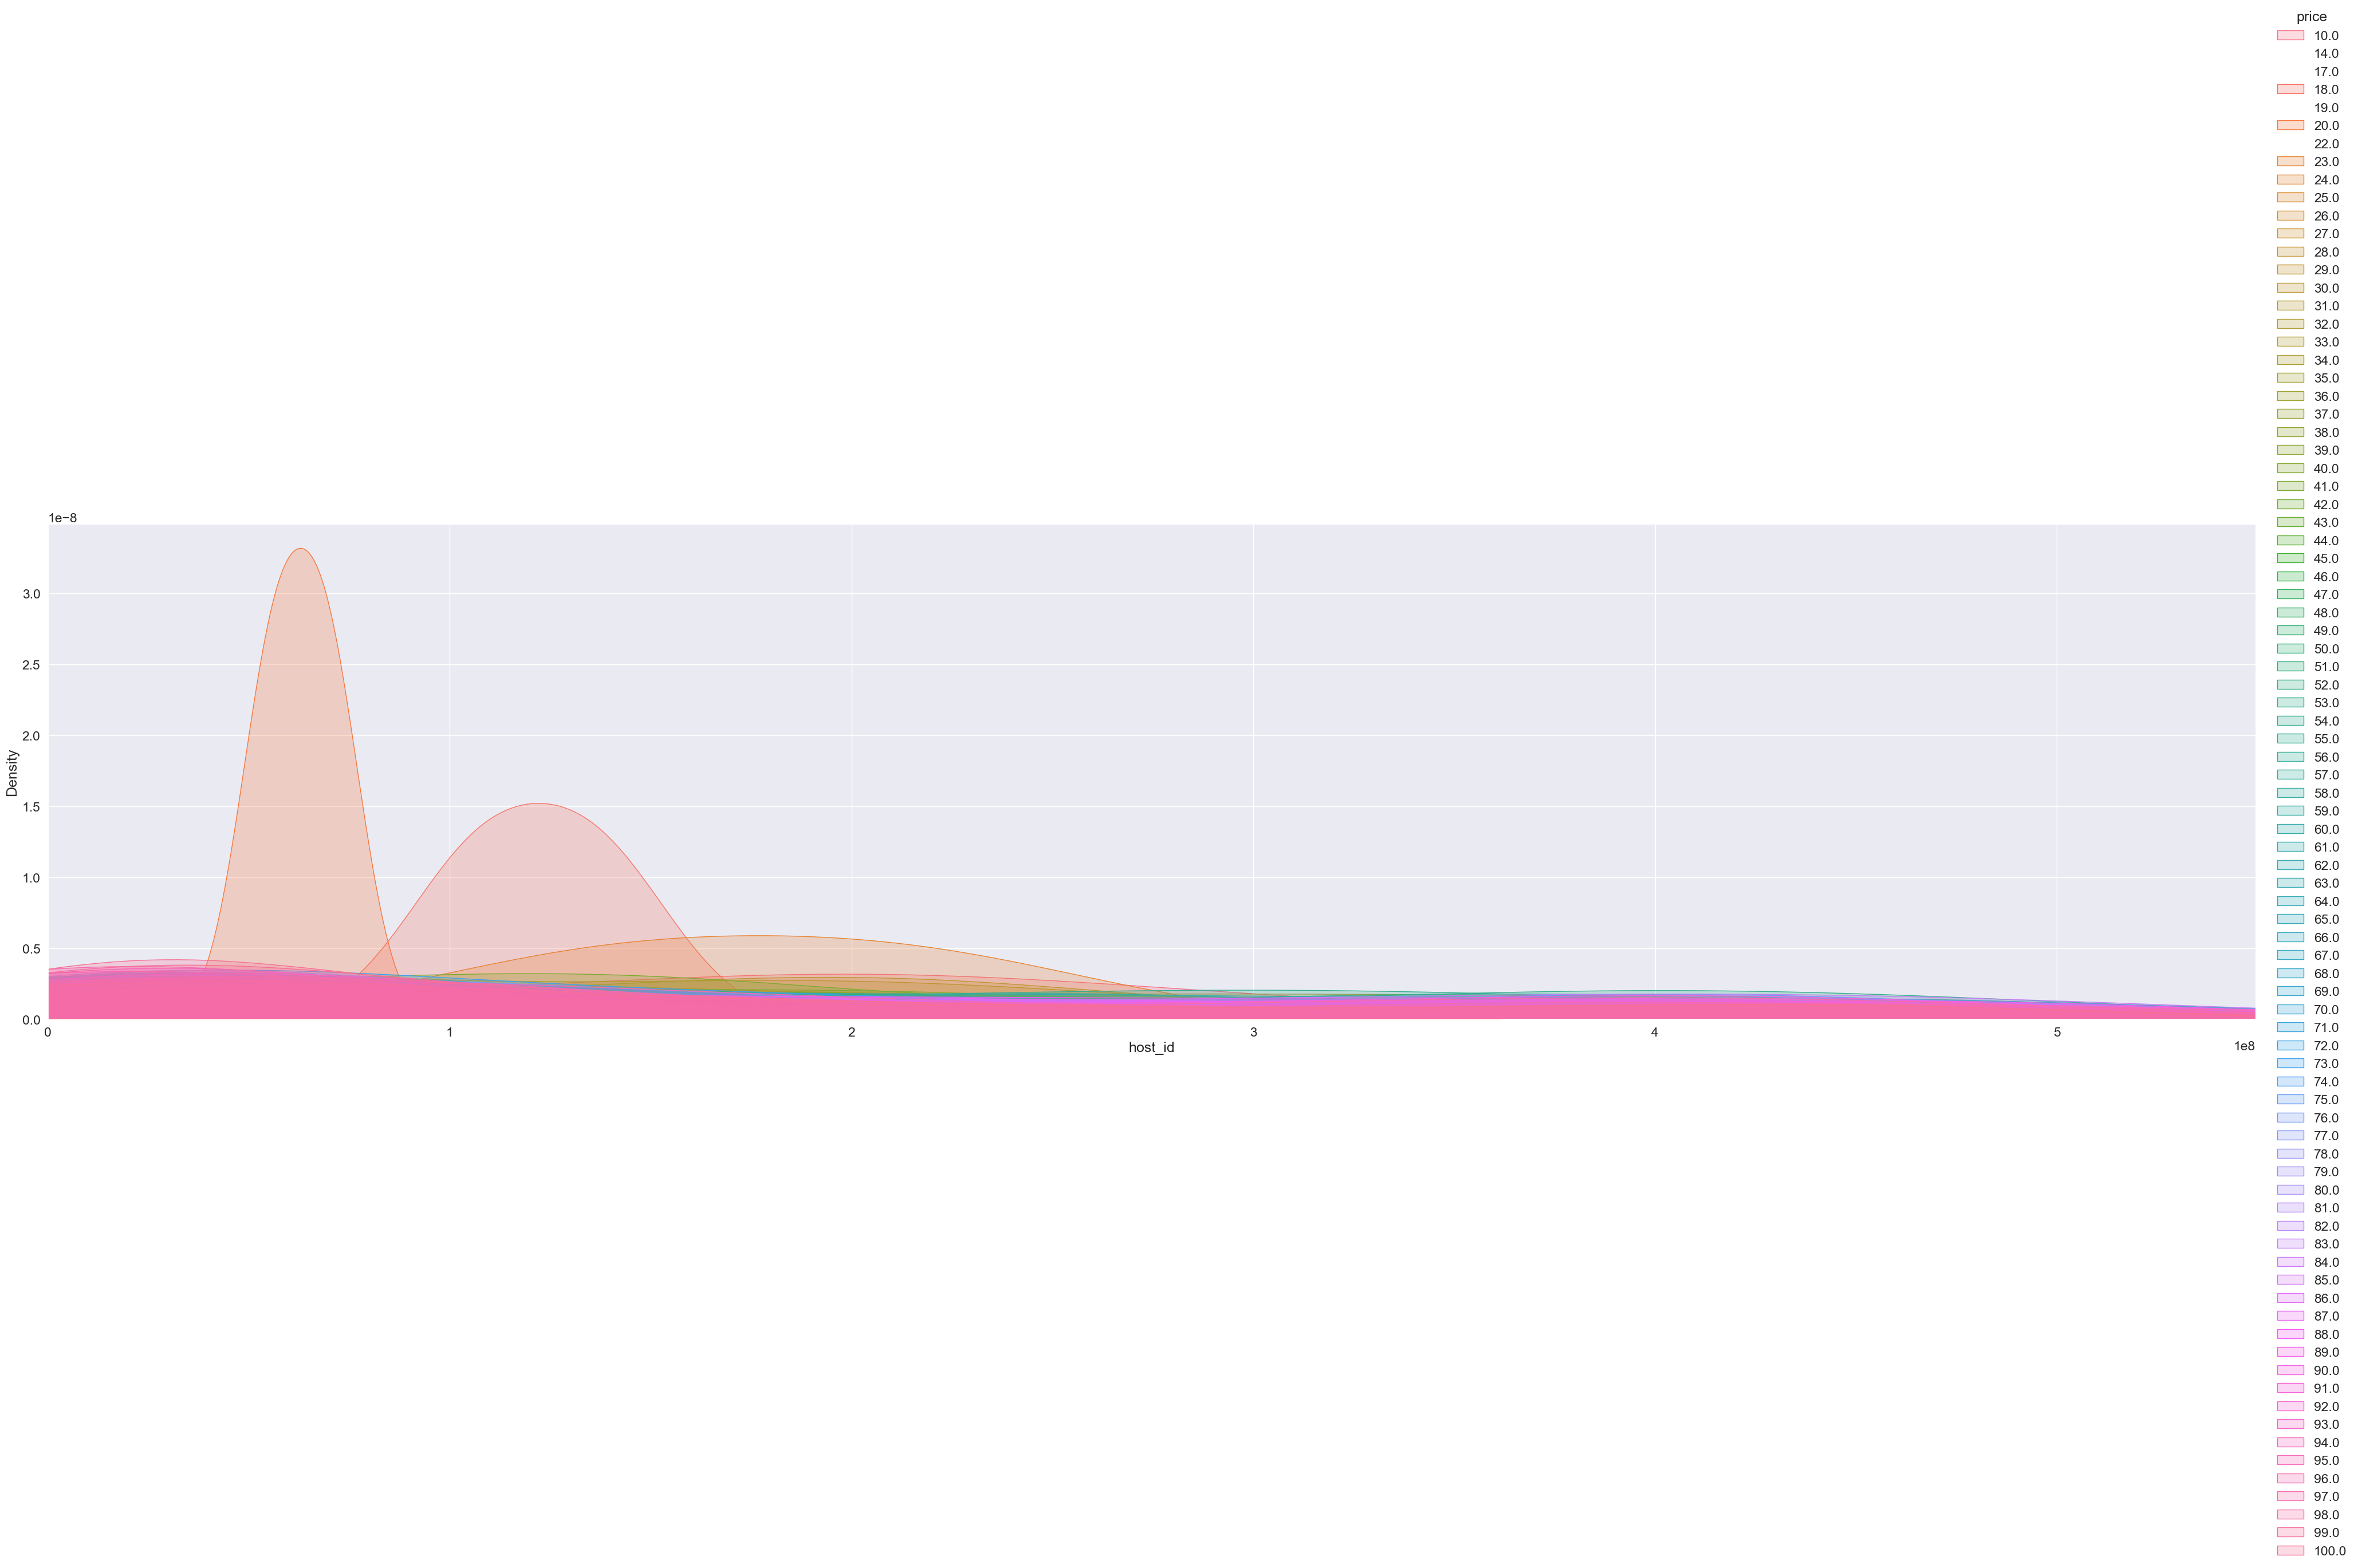

In [76]:
# Check if 'price' and 'host_id' columns exist in the DataFrame
if 'price' not in df.columns or 'host_id' not in df.columns:
    print("The 'price' or 'host_id' column does not exist in the DataFrame. Please check the column names.")
else:
    # Convert 'price' to numeric (in case it contains any non-numeric values) and filter for prices in range 0-100
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df_filtered = df[(df['price'] >= 0) & (df['price'] <= 100)].dropna(subset=['price', 'host_id'])

    # Set up a FacetGrid for KDE plots with price limited to $0-$100
    fig = sns.FacetGrid(df_filtered, hue="price", aspect=4, height=10)
    fig.map(sns.kdeplot, 'host_id', shade=True)

    # Get the maximum value for 'host_id' to set the x-axis limit
    oldest = df_filtered['host_id'].max()
    fig.set(xlim=(0, oldest))

    # Set font scale and add legend
    sns.set(font_scale=1.5)  # Adjust font scale for readability
    fig.add_legend()

    # Display the plot
    plt.show()

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

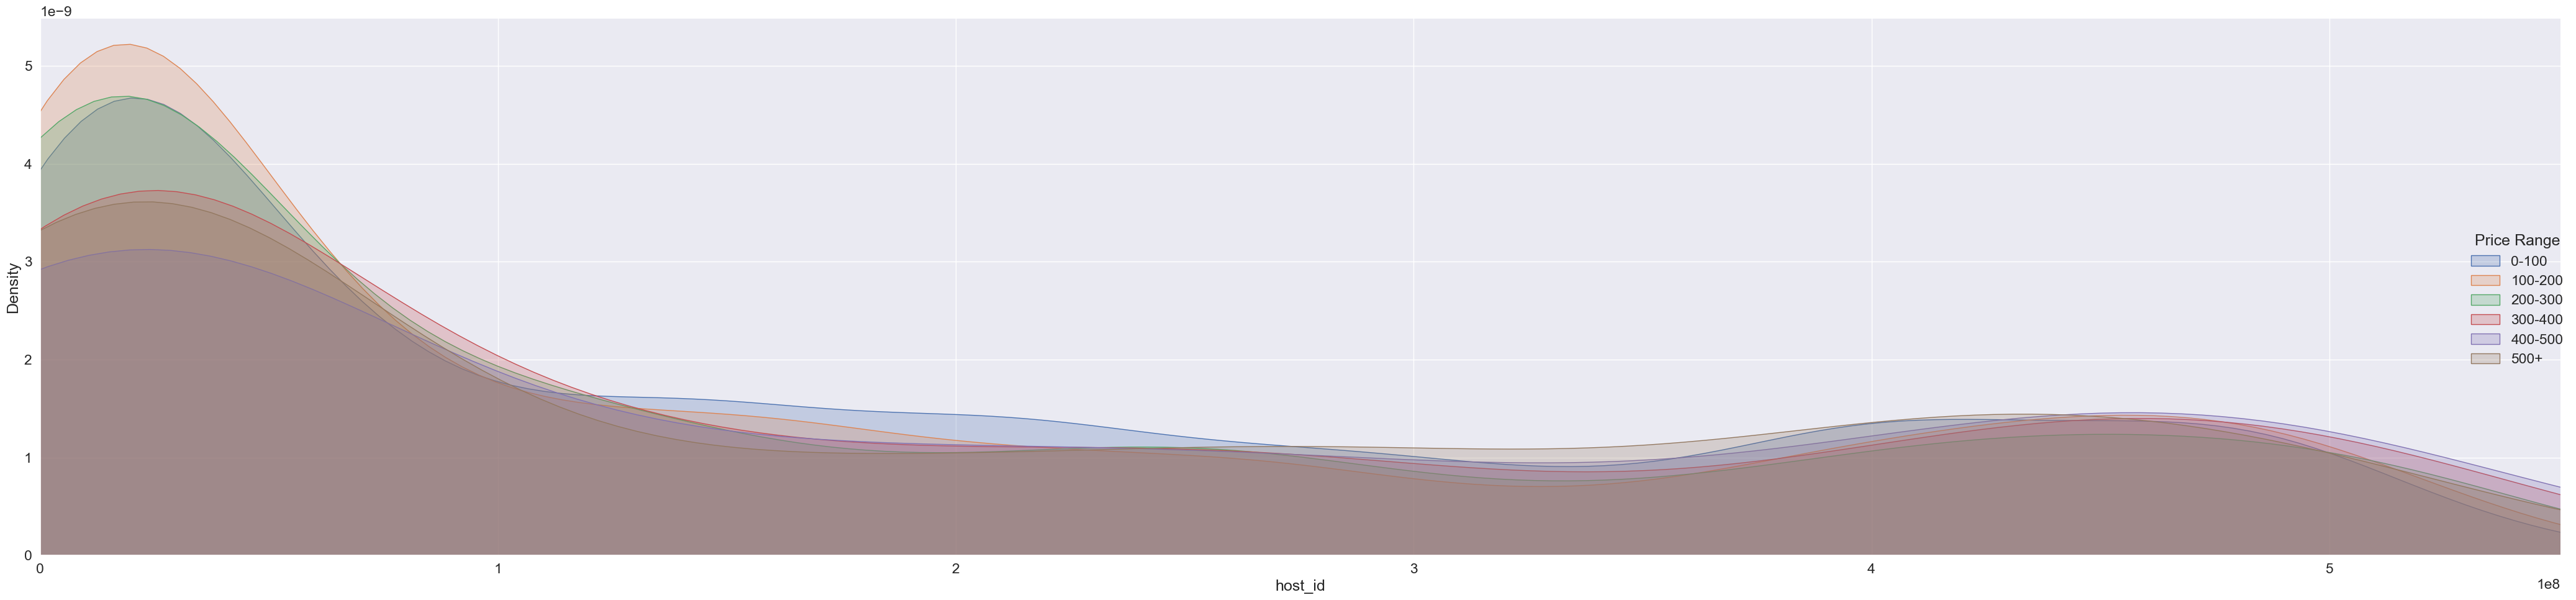

In [77]:
# Check if 'price' and 'host_id' columns exist in the DataFrame
if 'price' not in df.columns or 'host_id' not in df.columns:
    print("The 'price' or 'host_id' column does not exist in the DataFrame. Please check the column names.")
else:
    # Convert the 'price' column to numeric, handling non-numeric values
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df = df.dropna(subset=['price'])  # Drop rows with NaN values in 'price'

    # Filter data to include only prices within $0-$1000
    df = df[df['price'] <= 1000]

    # Create a new column for price ranges in $100 increments
    #df['price_range'] = pd.cut(df['price'], bins=range(0, 1100, 100), right=False, labels=[f"${i}-${i+100}" for i in range(0, 1000, 100)])

    # Initialize a FacetGrid with 'price_range' as hue and set the aspect ratio
    fig = sns.FacetGrid(df, hue="price_range", aspect=4, height=10)
    fig.map(sns.kdeplot, 'host_id', shade=True)

    # Set x-axis limits
    oldest = df['host_id'].max()
    fig.set(xlim=(0, oldest))

    # Adjust font size and add legend
    sns.set(font_scale=1.5)
    fig.add_legend(title="Price Range")

    # Show the plot
    plt.tight_layout()
    plt.show()

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


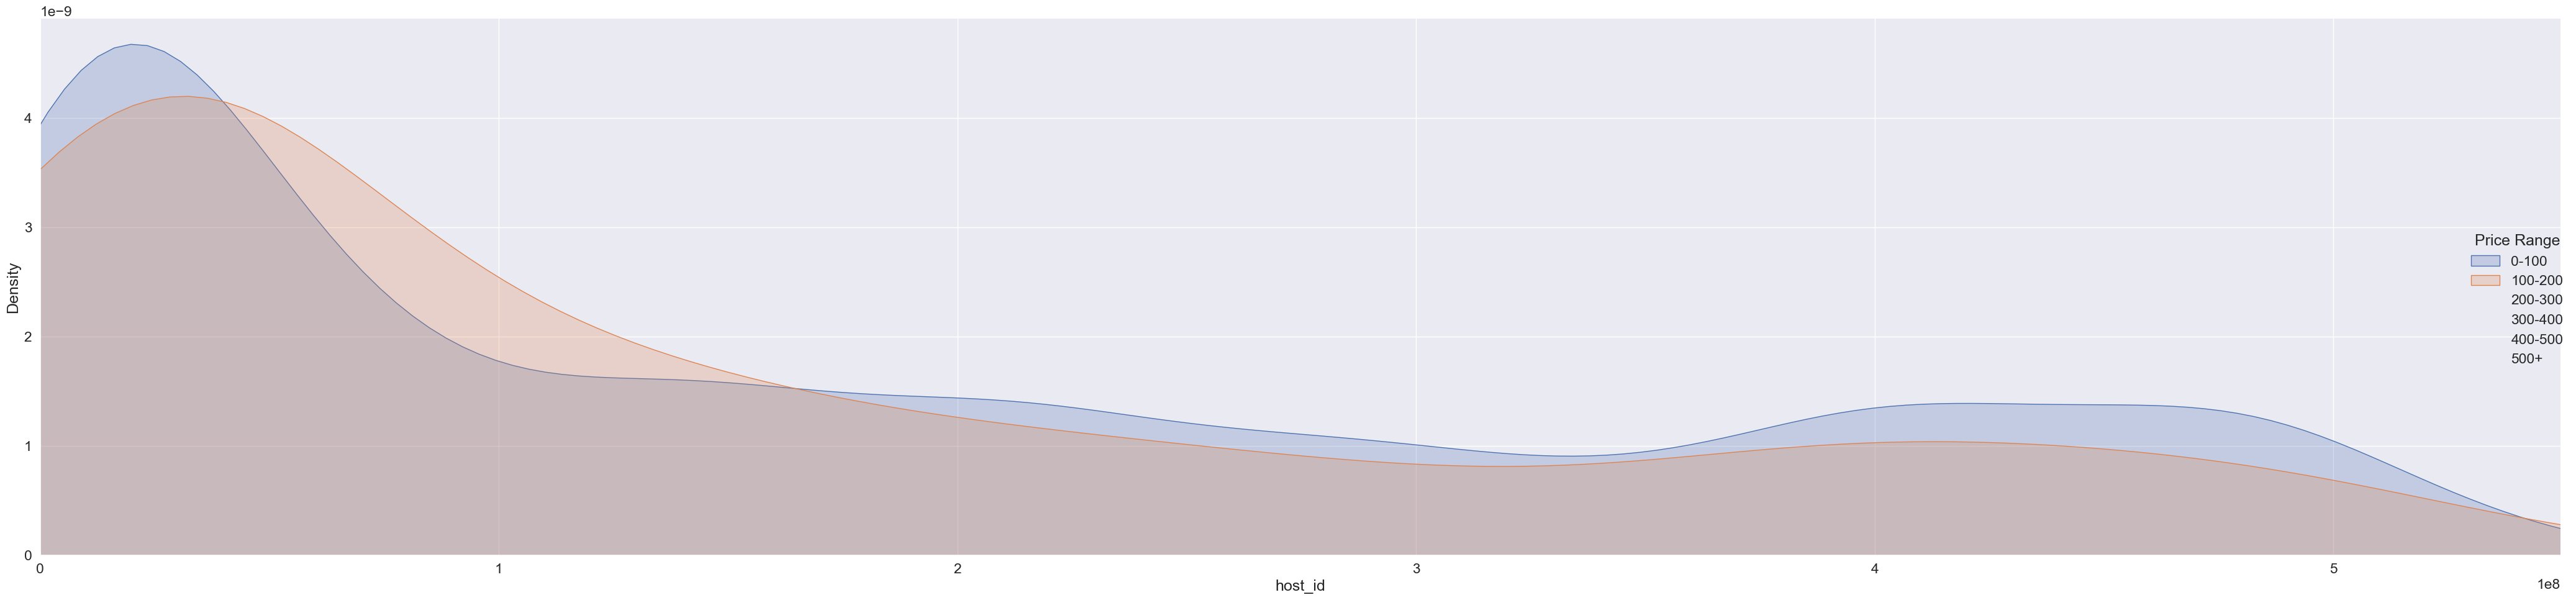

In [78]:
# Check if 'price' and 'host_id' columns exist in the DataFrame
if 'price' not in df.columns or 'host_id' not in df.columns:
    print("The 'price' or 'host_id' column does not exist in the DataFrame. Please check the column names.")
else:
    # Convert the 'price' column to numeric, handling non-numeric values
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df = df.dropna(subset=['price'])  # Drop rows with NaN values in 'price'

    # Filter data to include only prices within $0-$100
    df = df[df['price'] <= 100]

    # Initialize a FacetGrid with 'price_range' as hue and set the aspect ratio
    fig = sns.FacetGrid(df, hue="price_range", aspect=4, height=10)
    fig.map(sns.kdeplot, 'host_id', shade=True)

    # Set x-axis limits
    oldest = df['host_id'].max()
    fig.set(xlim=(0, oldest))

    # Adjust font size and add legend
    sns.set(font_scale=1.5)
    fig.add_legend(title="Price Range")

    # Show the plot
    plt.tight_layout()
    plt.show()

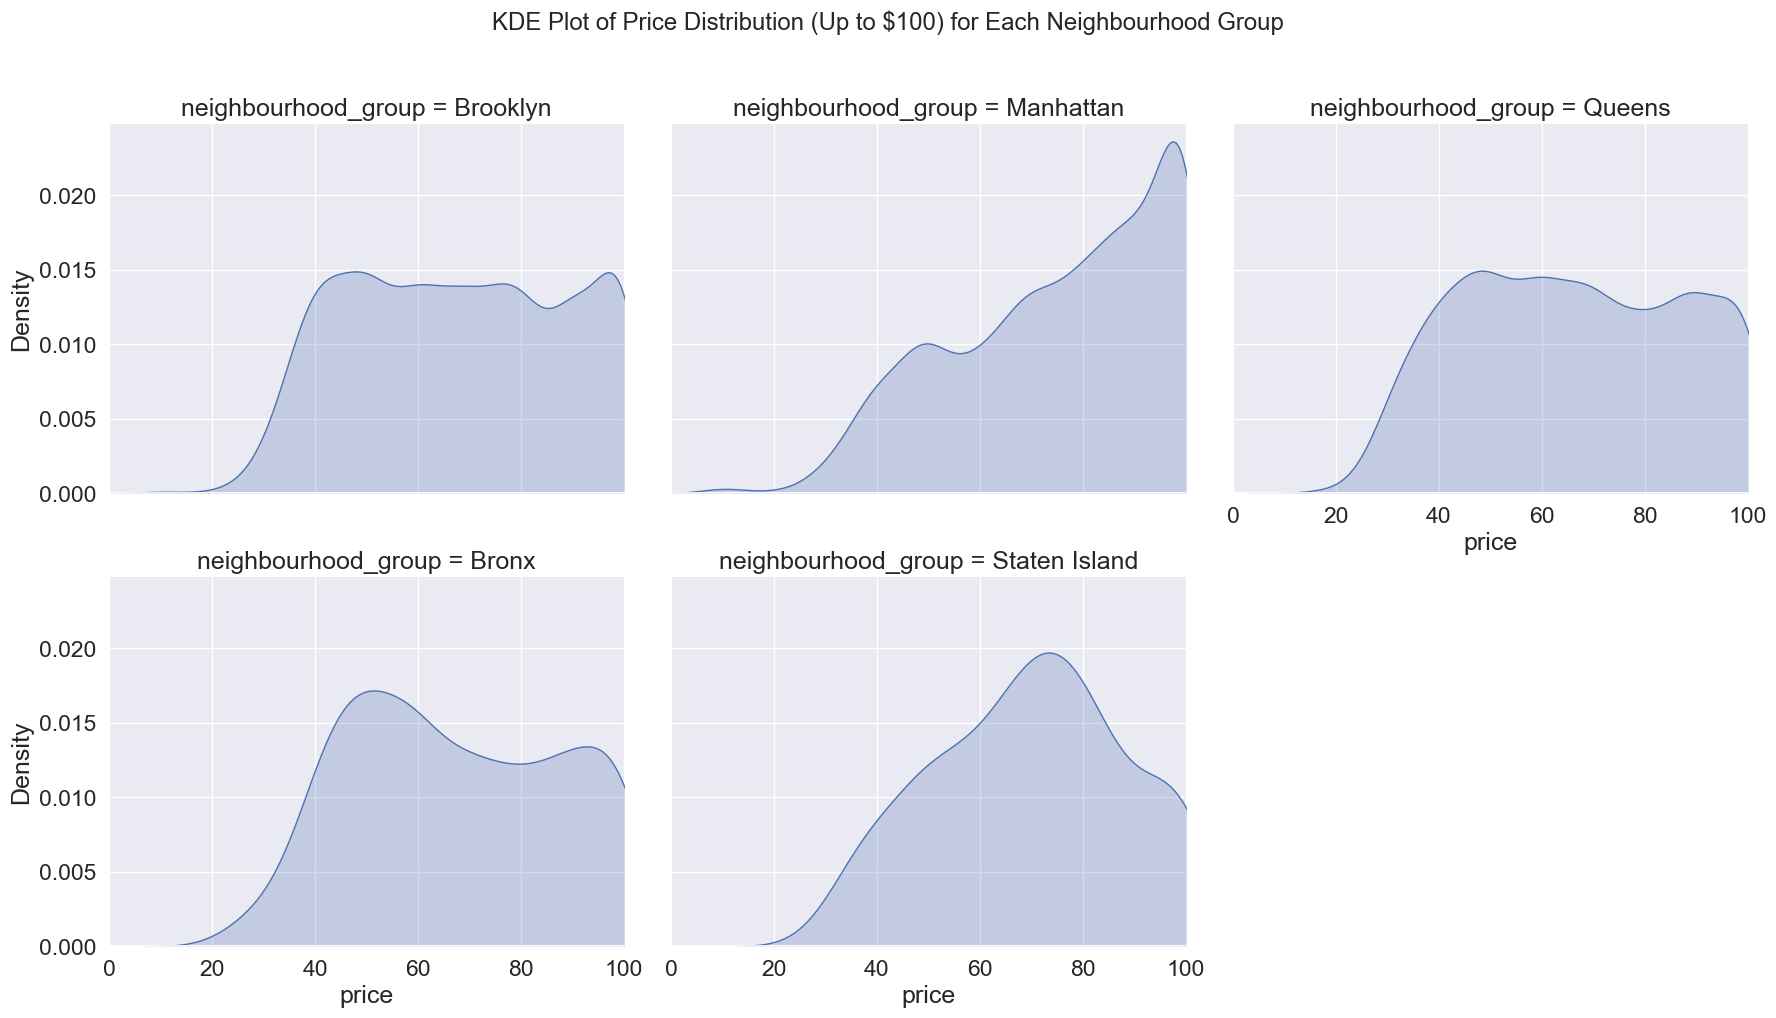

In [44]:
# Check if 'price' and 'neighbourhood_group' columns exist in the DataFrame
if 'price' not in df.columns or 'neighbourhood_group' not in df.columns:
    print("The 'price' or 'neighbourhood_group' column does not exist in the DataFrame. Please check the column names.")
else:
    # Convert the 'price' column to numeric, handling non-numeric values
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df = df.dropna(subset=['price'])  # Drop rows with NaN values in 'price'

    # Filter data to include only prices within $0-$100
    df_filtered = df[df['price'] <= 100]

    # Initialize a FacetGrid with 'neighbourhood_group' and set the aspect ratio
    fig = sns.FacetGrid(df_filtered, col="neighbourhood_group", col_wrap=3, height=5, aspect=1.2)
    fig.map(sns.kdeplot, 'price', fill=True)

    # Set x-axis limits for better visibility
    fig.set(xlim=(0, 100))

    # Adjust font size and add title
    sns.set(font_scale=1.2)  # Adjust the font scale for better readability
    fig.fig.suptitle("KDE Plot of Price Distribution (Up to $100) for Each Neighbourhood Group", y=1.02)

    # Show the plot
    plt.tight_layout()
    plt.show()

c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\zenit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=T

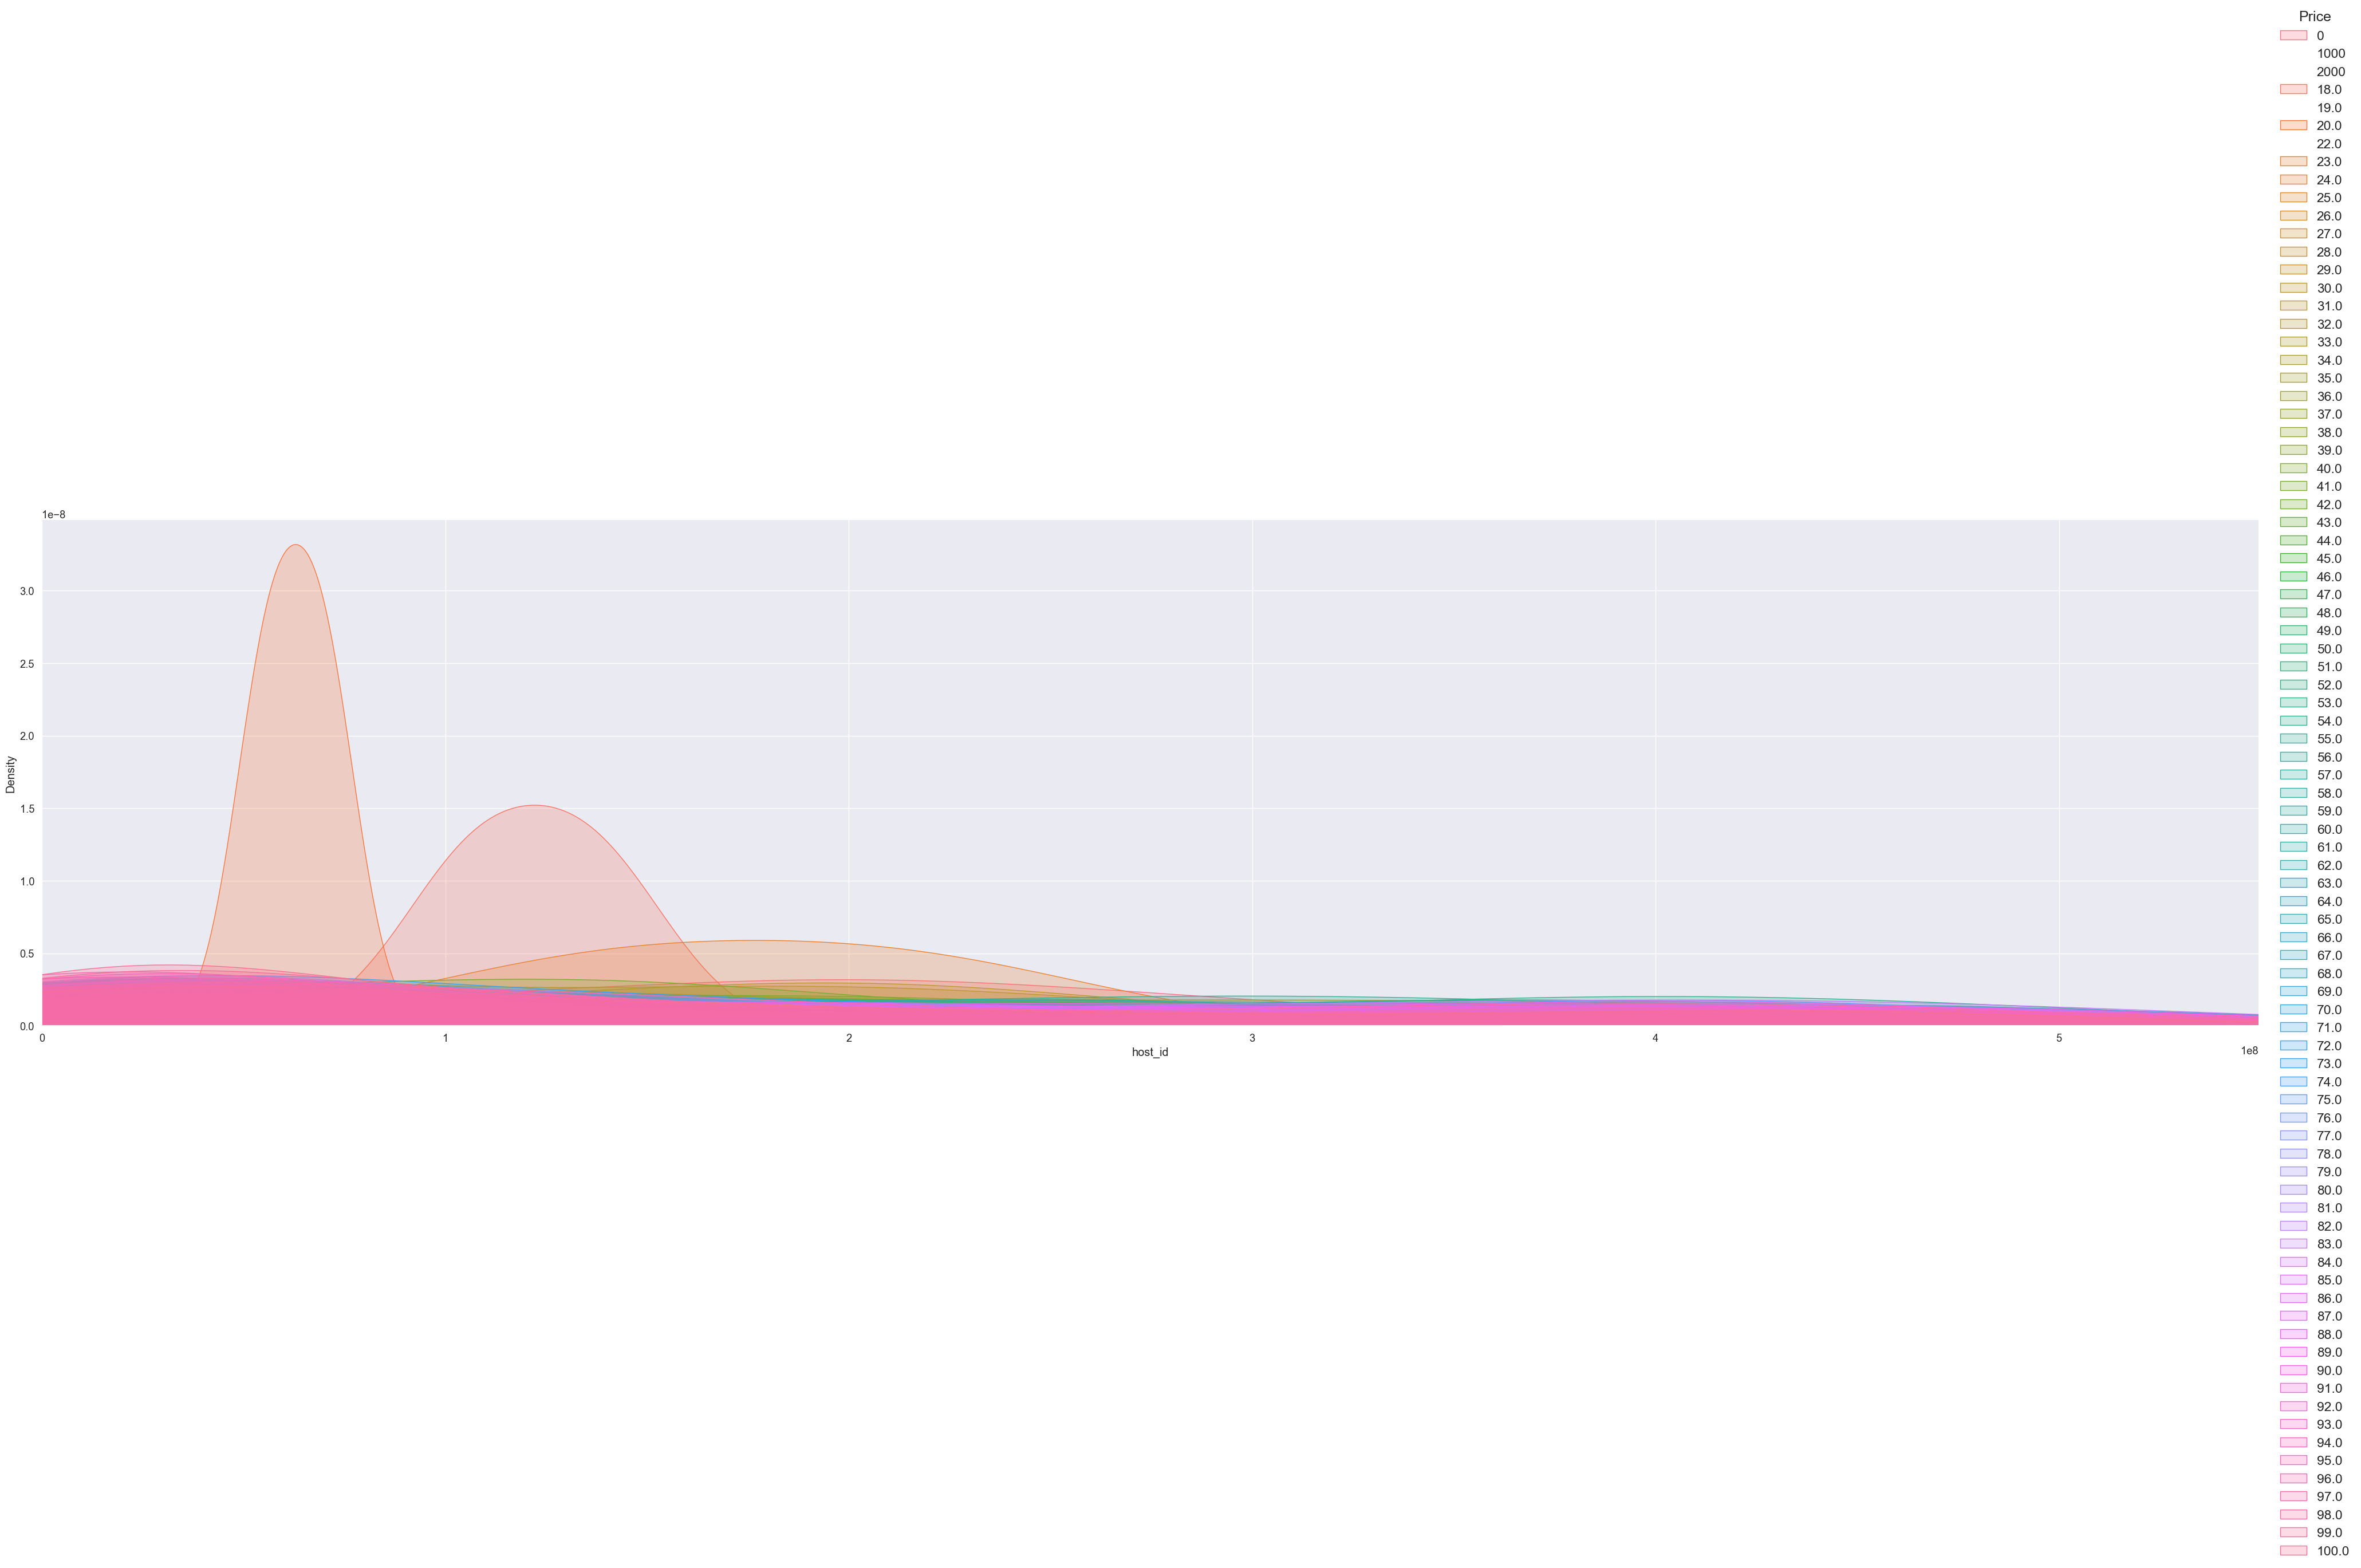

In [81]:
# Filter data to include only rows with price between 0 and 2000
df_filtered = df[(df['price'] >= 0) & (df['price'] <= 2000)]

# Adjust the height and aspect ratio
fig = sns.FacetGrid(df_filtered, hue="price", aspect=4, height=10)  # Set aspect and height
fig.map(sns.kdeplot, 'host_id', shade=True)

# Set x-axis limits
oldest = df_filtered['host_id'].max()
fig.set(xlim=(0, oldest))

# Save the figure with a manageable DPI
fig.savefig("filename.png", dpi=50)

# Adjust font scale and color legend
sns.set(font_scale=1.5)
fig.add_legend(title="Price")

# Manually set the legend labels to represent 0, 1000, and 2000 intervals
for text, label in zip(fig._legend.texts, ['0', '1000', '2000']):
    text.set_text(label)

plt.show()  # Display the plot